# Trabajo práctico integrador de CDD 2023

### Curso: 5K3
### Grupo: 04
### Integrantes:
- 78355	Azulay, David
- 87930	Brocanelli, Valentina
- 65155	Galizio, Matias
- 83723	Perlo, Matias
- 86852	Zuin, Lorenzo


## Objetivo del Notebook

El objetivo del siguiente Notebook es sintetizar el trabajo realizado durante las etapas del proyecto de ciencia de datos llevado a cabo sobre el set de datos recopilados sobre Libros y Reseñas realizadas dentro de la tienda de Amazon, su análisis y preprocesamiento. El mismo contiene el código ejecutado y documentado que nos permita repetir facilmente los resultados.

Para el trabajo, hemos utilizado los datos obtenidos desde el sitio de [Kraggle](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv), usando los nombres originales de los archivos y almacenados dentro de una subcarpeta `data/`.

## Pregunta del backlog para resolver

- Extender tabla de libros con las columnas ISBN y precio.
- Unificar tablas.
- Obtener la estadísticas de puntajes de reseñas de cada libro.
- Desarrollar un modelo predictivo para predecir el puntaje de una reseña de acuerdo a, inicialmente, su autor, género y precio.
- Desarrollar un modelo predictivo para predecir la utilidad de una reseña de acuerdo a, inicialmente, la longitud de su descripción.
- Realizar conclusiones de los modelos realizados.


# Lectura y exploración de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzy_match import algorithims

In [2]:
# carga de df_books
columns_books = ['Title', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink',
               'categories', 'ratingsCount']

columns_reviews = ['Id', 'Title', 'Price', 'review/helpfulness', 'review/score', 'review/text']

df_books = pd.read_csv('data/books_data.csv', usecols=columns_books)
df_books.head(10)

Title  \
0                     Its Only Art If Its Well Hung!   
1                           Dr. Seuss: American Icon   
2              Wonderful Worship in Smaller Churches   
3                      Whispers of the Wicked Saints   
4  Nation Dance: Religion, Identity and Cultural ...   
5  The Church of Christ: A Biblical Ecclesiology ...   
6                         The Overbury affair (Avon)   
7            A Walk in the Woods: a Play in Two Acts   
8                           Saint Hyacinth of Poland   
9  Rising Sons and Daughters: Life Among Japan's ...   

                    authors  \
0          ['Julie Strain']   
1            ['Philip Nel']   
2          ['David R. Ray']   
3       ['Veronica Haddon']   
4           ['Edward Long']   
5      ['Everett Ferguson']   
6  ['Miriam Allen De Ford']   
7          ['Lee Blessing']   
8  ['Mary Fabyan Windeatt']   
9        ['Steven Wardell']   

                                               image  \
0  http://books.google.com/books/content?id=DykPA...   
1  http://books.google.com/books/content?id=IjvHQ...   
2  http://books.google.com/books/content?id=2tsDA...   
3  http://books.google.com/books/content?id=aRSIg...   
4                                                NaN   
5  http://books.google.com/books/content?id=kVqRa...   
6                                                NaN   
7                                                NaN   
8  http://books.google.com/books/content?id=lmLqA...   
9                                                NaN   

                                         previewLink  \
0  http://books.google.nl/books?id=DykPAAAACAAJ&d...   
1  http://books.google.nl/books?id=IjvHQsCn_pgC&p...   
2  http://books.google.nl/books?id=2tsDAAAACAAJ&d...   
3  http://books.google.nl/books?id=aRSIgJlq6JwC&d...   
4  http://books.google.nl/books?id=399SPgAACAAJ&d...   
5  http://books.google.nl/books?id=kVqRaiPlx88C&p...   
6  http://books.google.nl/books?id=mHLTngEACAAJ&d...   
7  http://books.google.nl/books?id=6HDOwAEACAAJ&d...   
8  http://books.google.nl/books?id=lmLqAAAACAAJ&d...   
9  http://books.google.nl/books?id=rbLZugEACAAJ&d...   

                    publisher publishedDate  \
0                         NaN          1996   
1                   A&C Black    2005-01-01   
2                         NaN          2000   
3                   iUniverse       2005-02   
4                         NaN    2003-03-01   
5  Wm. B. Eerdmans Publishing          1996   
6                         NaN          1960   
7                         NaN          1988   
8             Tan Books & Pub    2009-01-01   
9          Plympton PressIntl          1995   

                                            infoLink  \
0  http://books.google.nl/books?id=DykPAAAACAAJ&d...   
1  http://books.google.nl/books?id=IjvHQsCn_pgC&d...   
2  http://books.google.nl/books?id=2tsDAAAACAAJ&d...   
3  http://books.google.nl/books?id=aRSIgJlq6JwC&d...   
4  http://books.google.nl/books?id=399SPgAACAAJ&d...   
5  http://books.google.nl/books?id=kVqRaiPlx88C&d...   
6  http://books.google.nl/books?id=mHLTngEACAAJ&d...   
7  http://books.google.nl/books?id=6HDOwAEACAAJ&d...   
8  http://books.google.nl/books?id=lmLqAAAACAAJ&d...   
9  http://books.google.nl/books?id=rbLZugEACAAJ&d...   

                      categories  ratingsCount  
0    ['Comics & Graphic Novels']           NaN  
1  ['Biography & Autobiography']           NaN  
2                   ['Religion']           NaN  
3                    ['Fiction']           NaN  
4                            NaN           NaN  
5                   ['Religion']           5.0  
6                            NaN           NaN  
7                            NaN           3.0  
8  ['Biography & Autobiography']           NaN  
9             ['Social Science']           NaN

In [3]:
# carga de df_reviews
df_reviews = pd.read_csv('data/Books_rating.csv', usecols=columns_reviews)
df_reviews.head(10)

Id                           Title  Price review/helpfulness  \
0  1882931173  Its Only Art If Its Well Hung!    NaN                7/7   
1  0826414346        Dr. Seuss: American Icon    NaN              10/10   
2  0826414346        Dr. Seuss: American Icon    NaN              10/11   
3  0826414346        Dr. Seuss: American Icon    NaN                7/7   
4  0826414346        Dr. Seuss: American Icon    NaN                3/3   
5  0826414346        Dr. Seuss: American Icon    NaN                2/2   
6  0826414346        Dr. Seuss: American Icon    NaN                3/4   
7  0826414346        Dr. Seuss: American Icon    NaN                0/0   
8  0826414346        Dr. Seuss: American Icon    NaN                0/0   
9  0826414346        Dr. Seuss: American Icon    NaN                3/5   

   review/score                                        review/text  
0           4.0  This is only for Julie Strain fans. It's a col...  
1           5.0  I don't care much for Dr. Seuss but after read...  
2           5.0  If people become the books they read and if "t...  
3           4.0  Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4           4.0  Philip Nel - Dr. Seuss: American IconThis is b...  
5           4.0  "Dr. Seuss: American Icon" by Philip Nel is a ...  
6           5.0  Theodor Seuss Giesel was best known as 'Dr. Se...  
7           5.0  When I recieved this book as a gift for Christ...  
8           5.0  Trams (or any public transport) are not usuall...  
9           4.0  As far as I am aware, this is the first book-l...

In [4]:
# datos de df_book
print("Datos de books_data.csv")
print("Datos por columna:\n", df_books.count(), sep="", end="\n\n")
print("Datos faltantes por columna:\n", df_books.isna().sum(), sep="", end="\n\n")
print("% datos faltantes por columna:\n", df_books.isna().sum() * 100 / len(df_books), sep="", end="\n\n")

Datos de books_data.csv
Datos por columna:
Title            212403
authors          180991
image            160329
previewLink      188568
publisher        136518
publishedDate    187099
infoLink         188568
categories       171205
ratingsCount      49752
dtype: int64

Datos faltantes por columna:
Title                 1
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

% datos faltantes por columna:
Title             0.000471
authors          14.789270
image            24.516958
previewLink      11.222011
publisher        35.727199
publishedDate    11.913617
infoLink         11.222011
categories       19.396527
ratingsCount     76.576712
dtype: float64



In [5]:
# datos de df_reviews
print("Datos de Books_rating.csv")
print("Datos por columna:\n", df_reviews.count(), sep="", end="\n\n")
print("Datos faltantes por columna:\n", df_reviews.isna().sum(), sep="", end="\n\n")
print("% datos faltantes por columna:\n", df_reviews.isna().sum() * 100 / len(df_reviews), sep="", end="\n\n")

Datos de Books_rating.csv
Datos por columna:
Id                    3000000
Title                 2999792
Price                  481171
review/helpfulness    3000000
review/score          3000000
review/text           2999992
dtype: int64

Datos faltantes por columna:
Id                          0
Title                     208
Price                 2518829
review/helpfulness          0
review/score                0
review/text                 8
dtype: int64

% datos faltantes por columna:
Id                     0.000000
Title                  0.006933
Price                 83.960967
review/helpfulness     0.000000
review/score           0.000000
review/text            0.000267
dtype: float64



## Preprocesamiento de los datos

In [6]:
df_books = df_books.drop(columns=['ratingsCount', 'image', 'previewLink', 'infoLink']).dropna()
df_reviews = df_reviews.dropna()

In [7]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130433 entries, 1 to 212402
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Title          130433 non-null  object
 1   authors        130433 non-null  object
 2   publisher      130433 non-null  object
 3   publishedDate  130433 non-null  object
 4   categories     130433 non-null  object
dtypes: object(5)
memory usage: 6.0+ MB


In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481164 entries, 10 to 2999988
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  481164 non-null  object 
 1   Title               481164 non-null  object 
 2   Price               481164 non-null  float64
 3   review/helpfulness  481164 non-null  object 
 4   review/score        481164 non-null  float64
 5   review/text         481164 non-null  object 
dtypes: float64(2), object(4)
memory usage: 25.7+ MB


### Análisis de libros duplicados en df de libros

In [9]:
df_books_unique = df_books["Title"].drop_duplicates(ignore_index=True)

print("\nCantidad de titulos sin duplicar en el df de libros: {}".format(df_books_unique.count()), end="\n")

print(f"Cantidad de libros en el df de libros: {df_books.count()}")


Cantidad de titulos sin duplicar en el df de libros: 130433
Cantidad de libros en el df de libros: Title            130433
authors          130433
publisher        130433
publishedDate    130433
categories       130433
dtype: int64


### Almacenamiento parcial de los cambios


In [10]:
df_books.to_csv('data/copia_1_books.csv', index=False)
df_reviews.to_csv('data/copia_1_reviews.csv', index=False)

### Carga de los cambios parciales

In [11]:
df_books = pd.read_csv('data/copia_1_books.csv')
df_reviews = pd.read_csv('data/copia_1_reviews.csv')

In [12]:
import re

### Análisis de Ids

In [13]:
df_reviews.head(10)

Id                                  Title  Price  \
0  0829814000  Wonderful Worship in Smaller Churches  19.40   
1  0829814000  Wonderful Worship in Smaller Churches  19.40   
2  0829814000  Wonderful Worship in Smaller Churches  19.40   
3  0829814000  Wonderful Worship in Smaller Churches  19.40   
4  0595344550          Whispers of the Wicked Saints  10.95   
5  0595344550          Whispers of the Wicked Saints  10.95   
6  0595344550          Whispers of the Wicked Saints  10.95   
7  0595344550          Whispers of the Wicked Saints  10.95   
8  0595344550          Whispers of the Wicked Saints  10.95   
9  0595344550          Whispers of the Wicked Saints  10.95   

  review/helpfulness  review/score  \
0               8/10           5.0   
1                1/1           5.0   
2                1/1           5.0   
3                1/1           5.0   
4               7/11           1.0   
5                1/2           4.0   
6                1/2           1.0   
7                2/4           5.0   
8                5/9           5.0   
9                1/3           5.0   

                                         review/text  
0  I just finished the book, &quot;Wonderful Wors...  
1  Many small churches feel like they can not hav...  
2  I just finished reading this amazing book and ...  
3  I hadn't been a small church pastor very long ...  
4  I bought this book because I read some glowing...  
5  I have to admit, I am not one to write reviews...  
6  This is a self-published book, and if you want...  
7  When I first read this the I was mezmerized at...  
8  I read the review directly under mine and I ha...  
9  I really enjoyed the book. I believe the autho...

In [14]:
def es_isbn(id):
    # Expresiones regulares para ISBN-10 y ISBN-13
    isbn_10_pattern = r'\b\d{9}[\d|X]\b'
    isbn_13_pattern = r'\b\d{13}\b'

    # Verificar si el identificador coincide con alguno de los patrones
    if re.match(isbn_10_pattern, id) or re.match(isbn_13_pattern, id):
        return 'ISBN'
    else:
        return 'Otro'

# Aplicar la función para etiquetar los registros
df_reviews['Id_Tipo'] = df_reviews['Id'].apply(es_isbn)

# Filtrar registros que tienen 'Id' en formato ISBN
df_isbn = df_reviews[df_reviews['Id_Tipo'] == 'ISBN']

df_isbn.count()

Id                    450411
Title                 450411
Price                 450411
review/helpfulness    450411
review/score          450411
review/text           450411
Id_Tipo               450411
dtype: int64

In [15]:
df_reviews_sorted = df_reviews.sort_values(by='Id_Tipo')
df_reviews_sorted.head(10)

Id                                      Title  Price  \
0       0829814000      Wonderful Worship in Smaller Churches  19.40   
313593  0876092121  Economic Sanctions and American Diplomacy  19.15   
313592  0876092121  Economic Sanctions and American Diplomacy  19.15   
313591  0876092121  Economic Sanctions and American Diplomacy  19.15   
313590  1584651946        American Wall Stenciling, 1790-1840  40.00   
313589  0471507741                 Espaol a lo vivo, Workbook  58.68   
313588  0471507741                 Espaol a lo vivo, Workbook  58.68   
313587  0195084888        Moore and Wittgenstein on Certainty  96.72   
313586  0816519676     Last Rampage: The Escape of Gary Tison  17.95   
313585  0816519676     Last Rampage: The Escape of Gary Tison  17.95   

       review/helpfulness  review/score  \
0                    8/10           5.0   
313593                0/0           3.0   
313592                2/2           5.0   
313591                2/2           5.0   
313590              16/18           5.0   
313589                0/2           1.0   
313588                1/1           4.0   
313587              18/18           5.0   
313586               3/15           3.0   
313585                1/3           3.0   

                                              review/text Id_Tipo  
0       I just finished the book, &quot;Wonderful Wors...    ISBN  
313593  The unfortunate part about books such as these...    ISBN  
313592  This book analyzes all the major cases of the ...    ISBN  
313591  This work illuminates the worst of American di...    ISBN  
313590  Last weekend I attended a party in RI and I fo...    ISBN  
313589  I received this book in total error. It was on...    ISBN  
313588  I started using this book for self study as my...    ISBN  
313587  Stroll's book is a must-read for anyone remote...    ISBN  
313586  I was somewhat disappointed with this book. Be...    ISBN  
313585  Tison, Greenawalt and his misguided idiot kids...    ISBN

In [16]:
df_reviews_sorted.tail(10)

Id                                              Title  Price  \
187202  B000FMRQQY                                    Family Violence   7.99   
52485   B000FO5APG  The Project Manager's Toolkit (Computer Weekly...  10.39   
423922  B000GPIA2Y                        The Yorkshire Terrier Today   2.99   
52457   B000GYI8RC  Applied Longitudinal Data Analysis for Epidemi...  12.00   
52456   B000GYI8RC  Applied Longitudinal Data Analysis for Epidemi...  12.00   
52455   B0007SE132  Contemporary Authors: Biography - Morton, H(en...   3.10   
52454   B0007SE132  Contemporary Authors: Biography - Morton, H(en...   3.10   
52453   B000063D6N                                 Making a Deal Work   7.95   
424000  B000GPIA24  Cliffsquickreview Calculus: Anton/Bivens/Davis...   1.00   
61139   B000FUFSR0                               Wealth Beyond Reason   3.70   

       review/helpfulness  review/score  \
187202                0/0           5.0   
52485                 0/0           5.0   
423922              13/13           5.0   
52457                 0/0           5.0   
52456                 4/4           5.0   
52455                 0/0           1.0   
52454                 1/1           1.0   
52453                 0/0           5.0   
424000              11/12           5.0   
61139                 2/9           1.0   

                                              review/text Id_Tipo  
187202  Valuable research which all but predicted toda...    Otro  
52485   Over the last few years we have transitioned i...    Otro  
423922  Ms. Sameja-Hilliard has captured the versatili...    Otro  
52457   The discussion of sphericity alone is worth th...    Otro  
52456   This book is really useful and handy. It is ve...    Otro  
52455   HV Morton was born at Ashton-under-Lyne near M...    Otro  
52454   i feel cheated by this so called 'biography'. ...    Otro  
52453   Very worthwhile reading for the more sophistic...    Otro  
424000  I bought this slim little book when I was firs...    Otro  
61139   A crappy e-book that repeats everything in eve...    Otro

### Eliminación de todos los registros que no corresponden a ISBNs
Algunos valores tienen una X al final, es un formato válido para ISBNs

In [17]:
df_reviews = df_reviews[df_reviews['Id_Tipo'] == 'ISBN']
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450411 entries, 0 to 481163
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  450411 non-null  object 
 1   Title               450411 non-null  object 
 2   Price               450411 non-null  float64
 3   review/helpfulness  450411 non-null  object 
 4   review/score        450411 non-null  float64
 5   review/text         450411 non-null  object 
 6   Id_Tipo             450411 non-null  object 
dtypes: float64(2), object(5)
memory usage: 27.5+ MB


## Análisis de relación entre los libros del dataframe de libros y de reseñas

In [18]:
df_books_reviews = df_reviews[['Id', 'Title']].drop_duplicates()
df_books_reviews = df_books_reviews.reset_index(drop=True)

df_books_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45367 entries, 0 to 45366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      45367 non-null  object
 1   Title   45367 non-null  object
dtypes: object(2)
memory usage: 709.0+ KB


In [19]:
duplicados = df_books_reviews[df_books_reviews['Id'].duplicated(keep=False)]
duplicados

Empty DataFrame
Columns: [Id, Title]
Index: []

### Titulos duplicados en el dataframe df_books_reviews

In [20]:
duplicados = df_books_reviews.duplicated(subset=['Title'], keep=False)

# Filtrar el DataFrame para obtener los registros duplicados
registros_duplicados = df_books_reviews[duplicados]

# Mostrar los registros duplicados
registros_duplicados

Id                                              Title
123    0873387775                    Tales of Soldiers and Civilians
169    155619630X  Translating Into Success: Cutting-edge strateg...
239    1556196318  Translating Into Success: Cutting-edge strateg...
249    0813026202  E-mails from Scheherazad (Contemporary Poetry ...
273    1419123548                                            Herland
...           ...                                                ...
45053  1583961054                      Tarzan and the Jewels of Opar
45099  0786187379                                            Beowulf
45105  0595335462     Mothering with Breastfeeding and Maternal Care
45196  0803938837  Social Cognition and Individual Change: Curren...
45220  0803938845  Social Cognition and Individual Change: Curren...

[1260 rows x 2 columns]

In [21]:
conteo_duplicados = registros_duplicados['Title'].value_counts()
conteo_duplicados

Title
Selected Poems                                                                                                                6
Texas Fury (Texas Series)                                                                                                     4
The Awakening                                                                                                                 4
The Mammoth Cheese                                                                                                            4
Poems                                                                                                                         4
                                                                                                                             ..
The Interpretation of the Flesh: Freud and Femininity                                                                         2
The Bartered Bride                                                                                

### Análisis de uniformidad de precios


### Verificación de que existe un único título para cada Id


In [22]:
title_counts = df_reviews.groupby('Id')['Title'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_titles_for_id = title_counts[title_counts > 1]

multiple_titles_for_id


Series([], Name: Title, dtype: int64)

### Verificación de que existe un único Id para cada título


In [23]:
id_counts = df_reviews.groupby('Title')['Id'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_ids_for_title = id_counts[id_counts > 1]

multiple_ids_for_title.sort_values(ascending=False)

Title
Selected Poems                                                                                        6
Poems                                                                                                 4
The Awakening                                                                                         4
Texas Fury (Texas Series)                                                                             4
The Mammoth Cheese                                                                                    4
                                                                                                     ..
Human Evolution and Prehistory                                                                        2
I Have This Nifty Idea: ...Now What Do I Do with It?                                                  2
Ideas and Options in English for Specific Purposes (ESL & Applied Linguistics Professional Series)    2
Images of the Passion: The Sacramental Mode in Film       

### Verificación de que existe un único precio para cada Id


In [24]:
price_discrepancies = df_reviews.groupby('Id')['Price'].nunique()

ids_con_distintos_precios = price_discrepancies[price_discrepancies > 1]

ids_con_distintos_precios

Series([], Name: Price, dtype: int64)

### Verificación de que existe un único precio para cada título



In [25]:
price_title_discrepancies = df_reviews.groupby('Title')['Price'].nunique()
price_title_discrepancies = price_title_discrepancies[price_title_discrepancies > 1]
price_title_discrepancies.sort_values(ascending=False)

Title
Selected Poems                                                                                        5
Poems                                                                                                 4
The Mammoth Cheese                                                                                    4
Texas Fury (Texas Series)                                                                             4
The Awakening                                                                                         4
                                                                                                     ..
Ideas and Options in English for Specific Purposes (ESL & Applied Linguistics Professional Series)    2
Images of the Passion: The Sacramental Mode in Film                                                   2
In Darkness and Secrecy: The Anthropology of Assault Sorcery and Witchcraft in Amazonia               2
In God's Name                                             

### Verificación de que existe un único precio para cada combinación de título e id

In [26]:
price_id_title_discrepancies = df_reviews.groupby(['Id','Title'])['Price'].nunique()
price_id_title_discrepancies = price_id_title_discrepancies[price_id_title_discrepancies > 1]
price_id_title_discrepancies.sort_values(ascending=False)

Series([], Name: Price, dtype: int64)

### Prueba eliminación de libros con título repetidos

In [27]:
df_reviews_copia = df_reviews.copy()
df_reviews_no_repetidos = df_reviews_copia[~df_reviews_copia['Title'].isin(multiple_ids_for_title.index)]

df_reviews_no_repetidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433205 entries, 0 to 481163
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  433205 non-null  object 
 1   Title               433205 non-null  object 
 2   Price               433205 non-null  float64
 3   review/helpfulness  433205 non-null  object 
 4   review/score        433205 non-null  float64
 5   review/text         433205 non-null  object 
 6   Id_Tipo             433205 non-null  object 
dtypes: float64(2), object(5)
memory usage: 26.4+ MB


### Verificación de que se eliminaron los registros correctos

In [28]:
id_counts_no_rep = df_reviews_no_repetidos.groupby('Title')['Id'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_ids_for_title_no_rep = id_counts_no_rep[id_counts_no_rep > 1]

multiple_ids_for_title_no_rep.sort_values(ascending=False)

Series([], Name: Id, dtype: int64)

### Verificación de que existe un único precio para cada título

In [29]:
price_title = df_reviews_no_repetidos.groupby('Title')['Price'].nunique()
price_title = price_title[price_title > 1]
price_title.sort_values(ascending=False)

Series([], Name: Price, dtype: int64)

In [30]:
title_counts_no_rep = df_reviews_no_repetidos.groupby('Id')['Title'].nunique()

# Filtrar los casos donde hay más de un título para un mismo 'Id'
multiple_titles_for_id_no_rep = title_counts_no_rep[title_counts > 1]

multiple_titles_for_id_no_rep

Series([], Name: Title, dtype: int64)

### Análisis de los libros que quedaron en el df de reseñas

In [31]:
df_books_reviews_no_rep = df_reviews_no_repetidos[['Id', 'Title']].drop_duplicates()
df_books_reviews_no_rep = df_books_reviews_no_rep.reset_index(drop=True)

df_books_reviews_no_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44107 entries, 0 to 44106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      44107 non-null  object
 1   Title   44107 non-null  object
dtypes: object(2)
memory usage: 689.3+ KB


### Agregar columna Id a df_books

In [32]:
df_reviews_id_titulo = df_reviews_no_repetidos[["Id","Title"]].drop_duplicates(ignore_index=True)
df_reviews_id_titulo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44107 entries, 0 to 44106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      44107 non-null  object
 1   Title   44107 non-null  object
dtypes: object(2)
memory usage: 689.3+ KB


In [33]:
df_books = df_books.merge(df_reviews_id_titulo, on='Title', how='inner')
isbn_column = df_books['Id']
df_books = df_books.drop(columns=['Id'])
df_books.insert(0, 'Id', isbn_column)
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             31360 non-null  object
 1   Title          31360 non-null  object
 2   authors        31360 non-null  object
 3   publisher      31360 non-null  object
 4   publishedDate  31360 non-null  object
 5   categories     31360 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [34]:
df_books.head(10)

Id                                              Title  \
0  0595344550                      Whispers of the Wicked Saints   
1  0802841899  The Church of Christ: A Biblical Ecclesiology ...   
2  0895554224                           Saint Hyacinth of Poland   
3  0792391810  Vector Quantization and Signal Compression (Th...   
4  0974289108  The Ultimate Guide to Law School Admission: In...   
5  0553763121  Overcoming Hypertension (Dr. Kenneth H. Cooper...   
6  158322047X           The Forbidden Stories of Marta Veneranda   
7  3161453549  Homer or Moses?: Early Christian Interpretatio...   
8  0887402216                            The Battleship Bismarck   
9  0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   

                              authors                          publisher  \
0                 ['Veronica Haddon']                          iUniverse   
1                ['Everett Ferguson']         Wm. B. Eerdmans Publishing   
2            ['Mary Fabyan Windeatt']                    Tan Books & Pub   
3  ['Allen Gersho', 'Robert M. Gray']  Springer Science & Business Media   
4                    ['Fiona Cownie']              Bloomsbury Publishing   
5               ['Kenneth H. Cooper']                             Bantam   
6             ['Sonia Rivera-Valdes']                Seven Stories Press   
7                 ['Arthur J. Droge']                       Mohr Siebeck   
8                ['Stefan Draminski']              Bloomsbury Publishing   
9             ['Kayode J. Fakinlede']                   Hippocrene Books   

  publishedDate                     categories  
0       2005-02                    ['Fiction']  
1          1996                   ['Religion']  
2    2009-01-01  ['Biography & Autobiography']  
3    2012-12-06   ['Technology & Engineering']  
4    2010-01-28                        ['Law']  
5    2012-02-01           ['Health & Fitness']  
6    2001-03-06                    ['Fiction']  
7          1989                   ['Religion']  
8    2018-09-20                    ['History']  
9          2005     ['Foreign Language Study']

### Agregar columna precio al df de libros

In [35]:
#precio_promedio = df_reviews_no_repetidos.groupby('Id')['Price'].agg(lambda x: np.nanmean(x[x.notna()])).reset_index()
precio_promedio = df_reviews_no_repetidos.groupby('Id')['Price'].agg(lambda x: np.nanmean(x)).reset_index()
precio_promedio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44107 entries, 0 to 44106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      44107 non-null  object 
 1   Price   44107 non-null  float64
dtypes: float64(1), object(1)
memory usage: 689.3+ KB


In [36]:
df_books = df_books.merge(precio_promedio, on='Id', how='left')
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             31360 non-null  object 
 1   Title          31360 non-null  object 
 2   authors        31360 non-null  object 
 3   publisher      31360 non-null  object 
 4   publishedDate  31360 non-null  object 
 5   categories     31360 non-null  object 
 6   Price          31360 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


In [37]:
df_books.head(10)

Id                                              Title  \
0  0595344550                      Whispers of the Wicked Saints   
1  0802841899  The Church of Christ: A Biblical Ecclesiology ...   
2  0895554224                           Saint Hyacinth of Poland   
3  0792391810  Vector Quantization and Signal Compression (Th...   
4  0974289108  The Ultimate Guide to Law School Admission: In...   
5  0553763121  Overcoming Hypertension (Dr. Kenneth H. Cooper...   
6  158322047X           The Forbidden Stories of Marta Veneranda   
7  3161453549  Homer or Moses?: Early Christian Interpretatio...   
8  0887402216                            The Battleship Bismarck   
9  0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   

                              authors                          publisher  \
0                 ['Veronica Haddon']                          iUniverse   
1                ['Everett Ferguson']         Wm. B. Eerdmans Publishing   
2            ['Mary Fabyan Windeatt']                    Tan Books & Pub   
3  ['Allen Gersho', 'Robert M. Gray']  Springer Science & Business Media   
4                    ['Fiona Cownie']              Bloomsbury Publishing   
5               ['Kenneth H. Cooper']                             Bantam   
6             ['Sonia Rivera-Valdes']                Seven Stories Press   
7                 ['Arthur J. Droge']                       Mohr Siebeck   
8                ['Stefan Draminski']              Bloomsbury Publishing   
9             ['Kayode J. Fakinlede']                   Hippocrene Books   

  publishedDate                     categories  Price  
0       2005-02                    ['Fiction']  10.95  
1          1996                   ['Religion']  25.97  
2    2009-01-01  ['Biography & Autobiography']  13.95  
3    2012-12-06   ['Technology & Engineering']  76.94  
4    2010-01-28                        ['Law']  14.95  
5    2012-02-01           ['Health & Fitness']  23.00  
6    2001-03-06                    ['Fiction']  21.95  
7          1989                   ['Religion']  97.50  
8    2018-09-20                    ['History']  34.95  
9          2005     ['Foreign Language Study']  19.77

### Análisis de la cantidad de autores de un libro y las categorías a las que pertenece

In [38]:
# contar la cantidad de autores
authors_count = df_books['authors'].apply(lambda x: len(eval(x)))
authors_count.head(10)

0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    1
8    1
9    1
Name: authors, dtype: int64

In [39]:
df_books['authors_count'] = authors_count

In [40]:
categories_count = df_books['categories'].apply(lambda x: len(eval(x)))
categories_count.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: categories, dtype: int64

In [41]:
df_books['categories_count'] = categories_count

In [42]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                31360 non-null  object 
 1   Title             31360 non-null  object 
 2   authors           31360 non-null  object 
 3   publisher         31360 non-null  object 
 4   publishedDate     31360 non-null  object 
 5   categories        31360 non-null  object 
 6   Price             31360 non-null  float64
 7   authors_count     31360 non-null  int64  
 8   categories_count  31360 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.2+ MB


In [43]:
df_books.head(10)

Id                                              Title  \
0  0595344550                      Whispers of the Wicked Saints   
1  0802841899  The Church of Christ: A Biblical Ecclesiology ...   
2  0895554224                           Saint Hyacinth of Poland   
3  0792391810  Vector Quantization and Signal Compression (Th...   
4  0974289108  The Ultimate Guide to Law School Admission: In...   
5  0553763121  Overcoming Hypertension (Dr. Kenneth H. Cooper...   
6  158322047X           The Forbidden Stories of Marta Veneranda   
7  3161453549  Homer or Moses?: Early Christian Interpretatio...   
8  0887402216                            The Battleship Bismarck   
9  0781810698   Beginner's Yoruba (Hippocrene Beginner's Series)   

                              authors                          publisher  \
0                 ['Veronica Haddon']                          iUniverse   
1                ['Everett Ferguson']         Wm. B. Eerdmans Publishing   
2            ['Mary Fabyan Windeatt']                    Tan Books & Pub   
3  ['Allen Gersho', 'Robert M. Gray']  Springer Science & Business Media   
4                    ['Fiona Cownie']              Bloomsbury Publishing   
5               ['Kenneth H. Cooper']                             Bantam   
6             ['Sonia Rivera-Valdes']                Seven Stories Press   
7                 ['Arthur J. Droge']                       Mohr Siebeck   
8                ['Stefan Draminski']              Bloomsbury Publishing   
9             ['Kayode J. Fakinlede']                   Hippocrene Books   

  publishedDate                     categories  Price  authors_count  \
0       2005-02                    ['Fiction']  10.95              1   
1          1996                   ['Religion']  25.97              1   
2    2009-01-01  ['Biography & Autobiography']  13.95              1   
3    2012-12-06   ['Technology & Engineering']  76.94              2   
4    2010-01-28                        ['Law']  14.95              1   
5    2012-02-01           ['Health & Fitness']  23.00              1   
6    2001-03-06                    ['Fiction']  21.95              1   
7          1989                   ['Religion']  97.50              1   
8    2018-09-20                    ['History']  34.95              1   
9          2005     ['Foreign Language Study']  19.77              1   

   categories_count  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1  
7                 1  
8                 1  
9                 1

### Cantidad de libros que tienen una cierta cantidad de categorias

In [44]:
distribucion_categorias = df_books['categories_count'].value_counts()
distribucion_categorias

categories_count
1    31360
Name: count, dtype: int64

Todos los libros tienen una única categoría.

### Cantidad de libros que tienen una cierta cantidad de autores

In [45]:
distribucion_autores = df_books['authors_count'].value_counts()
distribucion_autores

authors_count
1     24352
2      5322
3      1212
4       322
5        88
6        37
8         7
7         6
12        5
9         3
11        2
16        1
15        1
18        1
28        1
Name: count, dtype: int64

Hay 24352 libros que tienen un único autor, para facilitar el análisis nos quedaremos solo con estos libros

In [46]:
#df_books = df_books[(df_books['authors_count'] == 1) & (df_books['categories_count'] == 1)]
df_books = df_books[(df_books['authors_count'] <= 2) & (df_books['categories_count'] == 1)]
df_books.count()

Id                  29674
Title               29674
authors             29674
publisher           29674
publishedDate       29674
categories          29674
Price               29674
authors_count       29674
categories_count    29674
dtype: int64

### Análisis de los formatos de fecha de publicación

In [47]:
formatos_fecha = pd.DataFrame()

# Contar registros con formato AAAA-MM-dd
formatos_fecha['AAAA-MM-dd'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}-\d{2}')

# Contar registros con formato AAAA-MM
formatos_fecha['AAAA-MM'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}(?=-|$)')

# Contar registros con formato AAAA
formatos_fecha['AAAA'] = df_books['publishedDate'].str.count(r'\d{4}(?=-|$)')

formatos_fecha['Otro'] = df_books['publishedDate'].str.count(r'^(?!(\d{4}-\d{2}-\d{2}|\d{4}-\d{2}|\d{4})).*')

# Sumar el número de registros que no coinciden con los formatos conocidos
total_otro = formatos_fecha['Otro'].sum()


# Mostrar el recuento de cada formato de fecha
conteo_formatos = formatos_fecha.sum()

In [48]:

conteo_formatos

AAAA-MM-dd    17355
AAAA-MM       19274
AAAA          29671
Otro              2
dtype: int64

In [49]:
df_books[formatos_fecha['Otro'] > 0]

Id           Title  \
17007  1592798659  Wild Sorceress   
19080  1592248810      The Damned   

                                           authors  \
17007  ['Margaret L. Carter', 'Leslie Roy Carter']   
19080                             ['Charles Fort']   

                           publisher publishedDate   categories  Price  \
17007  Writers Exchange E-Publishing     101-01-01  ['Fiction']  18.00   
19080                       Lulu.com          196?  ['Science']  13.95   

       authors_count  categories_count  
17007              2                 1  
19080              1                 1

In [50]:
df_books['publishedDate'] = df_books['publishedDate'].str.extract(r'(\d{4})', expand=False)
formatos_fecha_df = pd.DataFrame()

# Contar registros con formato AAAA-MM-dd
formatos_fecha_df['AAAA-MM-dd'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}-\d{2}')

# Contar registros con formato AAAA-MM
formatos_fecha_df['AAAA-MM'] = df_books['publishedDate'].str.count(r'\d{4}-\d{2}(?=-|$)')

# Contar registros con formato AAAA
formatos_fecha_df['AAAA'] = df_books['publishedDate'].str.count(r'\d{4}(?=-|$)')

formatos_fecha_df['Otro'] = df_books['publishedDate'].str.count(r'^(?!(\d{4}-\d{2}-\d{2}|\d{4}-\d{2}|\d{4})).*')

conteo_formatos_df = formatos_fecha_df.sum()
conteo_formatos_df

AAAA-MM-dd        0.0
AAAA-MM           0.0
AAAA          29672.0
Otro              0.0
dtype: float64

In [51]:
df_books[formatos_fecha['Otro'] > 0]

Id           Title  \
17007  1592798659  Wild Sorceress   
19080  1592248810      The Damned   

                                           authors  \
17007  ['Margaret L. Carter', 'Leslie Roy Carter']   
19080                             ['Charles Fort']   

                           publisher publishedDate   categories  Price  \
17007  Writers Exchange E-Publishing           NaN  ['Fiction']  18.00   
19080                       Lulu.com           NaN  ['Science']  13.95   

       authors_count  categories_count  
17007              2                 1  
19080              1                 1

In [52]:
df_books[df_books['publishedDate'].isna()]

Id           Title  \
17007  1592798659  Wild Sorceress   
19080  1592248810      The Damned   

                                           authors  \
17007  ['Margaret L. Carter', 'Leslie Roy Carter']   
19080                             ['Charles Fort']   

                           publisher publishedDate   categories  Price  \
17007  Writers Exchange E-Publishing           NaN  ['Fiction']  18.00   
19080                       Lulu.com           NaN  ['Science']  13.95   

       authors_count  categories_count  
17007              2                 1  
19080              1                 1

In [53]:
# Para este caso, el autor, editorial y categoría no se corresponden con el registro real. Puede que existan más casos así, pero debido a que al final tenemos una relación uno a uno entre libros y autores no es tan significativo.
df_books[df_books['publisher'] == 'Borgo Press']

Id                                          Title  \
7350   1557423873  Jimgrim and the Seventeen Thieves of El-Kalil   
11995  1592249159       The Diamond Lens and Other Strange Tales   
12697  0878771506     Lighten Up Your Body, Lighten Up Your Life   

                      authors    publisher publishedDate  \
7350         ['Talbot Mundy']  Borgo Press          2005   
11995  ["Fitz James O'Brien"]  Borgo Press          2002   
12697   ['Lucia Capacchione']  Borgo Press          1990   

                    categories  Price  authors_count  categories_count  
7350               ['Fiction']  29.95              1                 1  
11995              ['Fiction']  18.95              1                 1  
12697  ['Body, Mind & Spirit']  12.95              1                 1

In [54]:
df_reviews[df_reviews['Id'] == '1592248810']

Id       Title  Price review/helpfulness  review/score  \
474817  1592248810  The Damned  13.95              25/26           5.0   
474818  1592248810  The Damned  13.95                2/2           2.0   
474819  1592248810  The Damned  13.95                2/2           3.0   
474820  1592248810  The Damned  13.95                0/0           5.0   
474821  1592248810  The Damned  13.95               8/14           3.0   
474822  1592248810  The Damned  13.95                0/2           3.0   

                                              review/text Id_Tipo  
474817  Blackwood explores the concept that the afterl...    ISBN  
474818  While the writing and suspense of this book ar...    ISBN  
474819  This is a good story and well worth reading. B...    ISBN  
474820  This book was very well written in the charact...    ISBN  
474821  again AB creates the greatest setting. a house...    ISBN  
474822  The writer tries very hard to be a world class...    ISBN

In [55]:
df_books[df_books['authors'] == 'Algernon Blackwood']

Empty DataFrame
Columns: [Id, Title, authors, publisher, publishedDate, categories, Price, authors_count, categories_count]
Index: []

In [56]:
df_books.loc[df_books['Id'] == '1592248810', 'authors'] = 'Algernon Blackwood'
df_books.loc[df_books['Id'] == '1592248810', 'categories'] = "['Fiction']"
df_books.loc[df_books['Id'] == '1592248810', 'publisher'] = 'Borgo Press'
df_books.loc[df_books['Id'] == '1592248810', 'publishedDate'] = 2002
#-----------------------------
#df_books.loc[df_books['Id'] == '1592798659', 'categories'] = "['Fantasy']"
df_books.loc[df_books['Id'] == '1592798659', 'publishedDate'] = 2004


### Unificación de los dataframes

In [57]:
df_reviews_no_repetidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433205 entries, 0 to 481163
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  433205 non-null  object 
 1   Title               433205 non-null  object 
 2   Price               433205 non-null  float64
 3   review/helpfulness  433205 non-null  object 
 4   review/score        433205 non-null  float64
 5   review/text         433205 non-null  object 
 6   Id_Tipo             433205 non-null  object 
dtypes: float64(2), object(5)
memory usage: 26.4+ MB


In [58]:
# Asignación del puntero de df_reviews_no_repetidos a df_reviews
df_reviews = df_reviews_no_repetidos

In [59]:
df = df_reviews.merge(df_books, on='Id', how='inner', suffixes=('_Review', '_Book'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309409 entries, 0 to 309408
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  309409 non-null  object 
 1   Title_Review        309409 non-null  object 
 2   Price_Review        309409 non-null  float64
 3   review/helpfulness  309409 non-null  object 
 4   review/score        309409 non-null  float64
 5   review/text         309409 non-null  object 
 6   Id_Tipo             309409 non-null  object 
 7   Title_Book          309409 non-null  object 
 8   authors             309409 non-null  object 
 9   publisher           309409 non-null  object 
 10  publishedDate       309409 non-null  object 
 11  categories          309409 non-null  object 
 12  Price_Book          309409 non-null  float64
 13  authors_count       309409 non-null  int64  
 14  categories_count    309409 non-null  int64  
dtypes: float64(3), int64(2), object(10

#### Diferencias entre los títulos y los precios de ambos dataframes

In [60]:
df[df['Title_Book']!= df['Title_Review']]

Empty DataFrame
Columns: [Id, Title_Review, Price_Review, review/helpfulness, review/score, review/text, Id_Tipo, Title_Book, authors, publisher, publishedDate, categories, Price_Book, authors_count, categories_count]
Index: []

### Eliminación de columnas duplicadas

In [61]:
df = df.drop(columns=['Title_Review', 'Price_Review'])
df.rename(columns={'Title_Book': 'Title', 'Price_Book': 'Price'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309409 entries, 0 to 309408
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  309409 non-null  object 
 1   review/helpfulness  309409 non-null  object 
 2   review/score        309409 non-null  float64
 3   review/text         309409 non-null  object 
 4   Id_Tipo             309409 non-null  object 
 5   Title               309409 non-null  object 
 6   authors             309409 non-null  object 
 7   publisher           309409 non-null  object 
 8   publishedDate       309409 non-null  object 
 9   categories          309409 non-null  object 
 10  Price               309409 non-null  float64
 11  authors_count       309409 non-null  int64  
 12  categories_count    309409 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 30.7+ MB


In [62]:
df = df.drop(columns='Id_Tipo')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309409 entries, 0 to 309408
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  309409 non-null  object 
 1   review/helpfulness  309409 non-null  object 
 2   review/score        309409 non-null  float64
 3   review/text         309409 non-null  object 
 4   Title               309409 non-null  object 
 5   authors             309409 non-null  object 
 6   publisher           309409 non-null  object 
 7   publishedDate       309409 non-null  object 
 8   categories          309409 non-null  object 
 9   Price               309409 non-null  float64
 10  authors_count       309409 non-null  int64  
 11  categories_count    309409 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 28.3+ MB


## Segunda etapa de preprocesado

### Análisis de la cantidad de reseñas por cada libro

In [63]:
conteo_registros_repetidos = df.groupby(['Id', 'Title']).size().reset_index(name='conteo')
conteo_registros_repetidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29674 entries, 0 to 29673
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      29674 non-null  object
 1   Title   29674 non-null  object
 2   conteo  29674 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 695.6+ KB


In [64]:
conteo_registros_repetidos.sort_values(by='conteo', ascending=False)

Id                                              Title  conteo
4862   0440224675                                           Hannibal    2793
2962   0307280721                       Eldest (Inheritance, Book 2)    1643
4800   0435126024                           Jane Eyre (New Windmill)    1523
9723   069452607X                                      Good to Great    1060
25519  1589269063  The Five Love Languages: The Secret to Love th...     988
...           ...                                                ...     ...
7750   0595235425                                              Delay       1
21165  1401899226           Exam Preparation for Fire Officer I & II       1
7745   0595234860  Joe Blow: The Extraordinary True Stories of an...       1
7742   0595234666                   Lucky Street Chronicles: A Novel       1
29673  9999275109          The Best Short Stories of Edgar Allan Poe       1

[29674 rows x 3 columns]

In [65]:
df_copia = df.merge(conteo_registros_repetidos, on=['Id', 'Title'], how='left')
df_copia = df_copia[df_copia['conteo'] >= 100]

df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77406 entries, 2160 to 308847
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  77406 non-null  object 
 1   review/helpfulness  77406 non-null  object 
 2   review/score        77406 non-null  float64
 3   review/text         77406 non-null  object 
 4   Title               77406 non-null  object 
 5   authors             77406 non-null  object 
 6   publisher           77406 non-null  object 
 7   publishedDate       77406 non-null  object 
 8   categories          77406 non-null  object 
 9   Price               77406 non-null  float64
 10  authors_count       77406 non-null  int64  
 11  categories_count    77406 non-null  int64  
 12  conteo              77406 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 8.3+ MB


In [66]:
df_copia.sort_values(by='conteo', ascending=False).head(10)

Id review/helpfulness  review/score  \
98127  0440224675                0/0           4.0   
97854  0440224675                1/1           5.0   
97844  0440224675                0/0           5.0   
97845  0440224675                1/1           4.0   
97846  0440224675                1/1           4.0   
97847  0440224675                1/1           5.0   
97848  0440224675                1/1           5.0   
97849  0440224675                1/1           5.0   
97850  0440224675                1/1           5.0   
97851  0440224675                1/1           5.0   

                                             review/text     Title  \
98127  I feel a bit odd saying I enjoyed a book with ...  Hannibal   
97854  I'm only 15. When Silence of the Lambs came ou...  Hannibal   
97844  I loved this book. It amazed me. I never belie...  Hannibal   
97845  The reason I'm giving HANNIBAL 4 stars is beca...  Hannibal   
97846  Hi,I don't write spoilers. Many people like th...  Hannibal   
97847  I just finished this book and loved every page...  Hannibal   
97848  Clarice Starling's career is now in ruins, tha...  Hannibal   
97849  Brilliant, with as daring and unexpected an en...  Hannibal   
97850  This book is everything I expected and more. W...  Hannibal   
97851  This is a good book. Quite possibly my favorit...  Hannibal   

                 authors publisher publishedDate   categories  Price  \
98127  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97854  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97844  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97845  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97846  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97847  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97848  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97849  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97850  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   
97851  ['Thomas Harris']      Dell          2009  ['Fiction']   7.67   

       authors_count  categories_count  conteo  
98127              1                 1    2793  
97854              1                 1    2793  
97844              1                 1    2793  
97845              1                 1    2793  
97846              1                 1    2793  
97847              1                 1    2793  
97848              1                 1    2793  
97849              1                 1    2793  
97850              1                 1    2793  
97851              1                 1    2793

In [67]:
df_copia['Id'].unique()

array(['0312267932', '0684813483', '0786191570', '0764229893',
       '0195085140', '0738703192', '0877794685', '0761139850',
       '1580627560', '0756602610', '1565119762', '0595329179',
       '0060513659', '155832156X', '0393322963', '0613176375',
       '038079456X', '187882323X', '0613176391', '0440228840',
       '1590523172', '0525244581', '031286583X', '0312992416',
       '1592850995', '0312992432', '0786117729', '1423319621',
       '1419390686', '0440229405', '1593350538', '0899682545',
       '0345487524', '0786884088', '1400042704', '0684866048',
       '0786112891', '0761136193', '1931412065', '1417627530',
       '0385249373', '1596006080', '0743249976', '0743249992',
       '1596001100', '1594567263', '0393049825', '140013188X',
       '1882577981', '0451204727', '1589269063', '0786114053',
       '0974256919', '0435126024', '1591858828', '184046254X',
       '0898701775', '0972217320', '0060744499', '0321344758',
       '078680534X', '0375705856', '0764120840', '03757

### Almacenamiento intermedio del dataframe

In [68]:
df_copia.to_csv('data/dataframe_copia.csv', index=False)

### Carga del dataframe

In [69]:
df = pd.read_csv('data/dataframe_copia.csv')

### Etapa final de preprocesado

### Cambio de texto e reviews por el conteo de caracteres

In [70]:
def filtro_fila_review(row):
    return len(str(row['review/text']).replace(' ', ''))

df['review/text'] = df.apply(filtro_fila_review, axis=1)

### Se paración de valores de review/helpfulness en calificaciones de review positivas y totales

In [71]:
review_helpfulness = df['review/helpfulness'].apply(lambda x: x.split("/"))
review_helpfulness_up = review_helpfulness.apply(lambda x: x[0])
review_helpfulness_total = review_helpfulness.apply(lambda x: x[1])

In [72]:
df['review_helpfulness_up'] = review_helpfulness_up
df['review_helpfulness_total'] = review_helpfulness_total

In [73]:
df = df.drop(columns='review/helpfulness')
#df
df.sample(n=50, random_state=43)

Id  review/score  review/text  \
31624  0895947366           5.0          243   
62624  0609807900           5.0          516   
64388  0895261596           5.0          680   
4028   187882323X           5.0          116   
33955  081296683X           1.0          807   
77136  0805068317           5.0           92   
76655  0060927941           4.0          626   
19886  0743470982           4.0          262   
68106  0399152830           1.0          222   
55900  1579570003           1.0         1012   
210    0684813483           5.0         2182   
36382  080652569X           1.0          374   
63529  1401308201           5.0         1280   
21240  0764229907           5.0          113   
47390  0613224477           3.0          261   
27997  0440224675           1.0          258   
1160   0877794685           5.0          157   
34052  061858532X           5.0         1529   
35962  1591940087           5.0          100   
39552  1593355688           5.0         1668   
67755  0316058254           5.0          439   
56618  1421808803           4.0          103   
70763  0486417824           5.0         1237   
32507  0440218802           2.0         1484   
41150  0833585568           5.0         2200   
18532  1580812287           4.0          654   
4396   0613176391           5.0           32   
18090  0553562967           5.0          370   
32744  0767902874           5.0          218   
72541  1401911498           5.0          945   
47942  0595356141           4.0          754   
70969  1419354795           5.0          326   
71974  1401911498           5.0          121   
4541   0440228840           4.0          531   
51151  0805350861           5.0          146   
64902  0748608370           2.0          236   
64973  0748608370           5.0          641   
5591   031286583X           4.0          271   
15324  0321344758           4.0          219   
68275  0399152830           1.0          901   
75025  0785263705           5.0          281   
24787  1561034371           1.0          290   
13252  0435126024           5.0           63   
58495  155395095X           4.0          217   
10965  1882577981           5.0          222   
35523  0613659155           1.0         1154   
59562  0892747560           5.0         1316   
69607  0962833029           3.0          365   
15450  078680534X           4.0          166   
32927  0613161432           5.0          302   

                                                   Title  \
31624  Essential Reiki: A Complete Guide to an Ancien...   
62624            Sloppy Firsts (Jessica Darling, Book 1)   
64388  A Republic, Not an Empire: Reclaiming America'...   
4028   Marijuana Horticulture: The Indoor/Outdoor Med...   
33955         Girls' Poker Night: A Novel of High Stakes   
77136                    The Scrambled States of America   
76655  Don't Pee on My Leg and Tell Me It's Raining: ...   
19886                          Zane's Afterburn: A Novel   
68106                 Predator (Kay Scarpetta Mysteries)   
55900                                Child Training Tips   
210                             The Pie and Pastry Bible   
36382       REAL Ultimate Power: The Official Ninja Book   
63529  Wicked: The Grimmerie, a Behind-the-Scenes Loo...   
21240    Song of Redemption (Chronicles of the Kings #2)   
47390  Stone Of Tears (Turtleback School & Library Bi...   
27997                                           Hannibal   
1160   Webster's Third New International Dictionary, ...   
34052                           A Certain Slant of Light   
35962         The Jungle Book (Townsend Library Edition)   
39552     A Caress of Twilight (Meredith Gentry, Book 2)   
67755                               A Mango-Shaped Space   
56618                                      Night And Day   
70763             Dubliners (Dover Large Print Classics)   
32507  Bravo Two Zero: The Harrowing True Story of a ...   
41150  Maniac Magee (Turtleback School & Library Bind...   
18532 

### Eliminación de formato de lista de categorias y autores

In [74]:
#df['authors'] = df['authors'].apply(lambda author: re.sub(r"[\([{})'\]]", '', author))
df['categories'] = df['categories'].apply(lambda cat: re.sub(r"[\([{})'\]]", '', cat))

df.head(10)

Id  review/score  review/text                       Title  \
0  0312267932           4.0          620  When All Hell Breaks Loose   
1  0312267932           5.0          146  When All Hell Breaks Loose   
2  0312267932           4.0          429  When All Hell Breaks Loose   
3  0312267932           4.0          389  When All Hell Breaks Loose   
4  0312267932           4.0          101  When All Hell Breaks Loose   
5  0312267932           4.0          717  When All Hell Breaks Loose   
6  0312267932           3.0          326  When All Hell Breaks Loose   
7  0312267932           5.0          393  When All Hell Breaks Loose   
8  0312267932           5.0          276  When All Hell Breaks Loose   
9  0312267932           5.0          198  When All Hell Breaks Loose   

                             authors               publisher  publishedDate  \
0  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
1  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
2  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
3  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
4  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
5  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
6  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
7  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
8  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
9  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   

         categories  Price  authors_count  categories_count  conteo  \
0  Health & Fitness  13.25              2                 1     126   
1  Health & Fitness  13.25              2                 1     126   
2  Health & Fitness  13.25              2                 1     126   
3  Health & Fitness  13.25              2                 1     126   
4  Health & Fitness  13.25              2                 1     126   
5  Health & Fitness  13.25              2                 1     126   
6  Health & Fitness  13.25              2                 1     126   
7  Health & Fitness  13.25              2                 1     126   
8  Health & Fitness  13.25              2                 1     126   
9  Health & Fitness  13.25              2                 1     126   

  review_helpfulness_up review_helpfulness_total  
0                     0                        0  
1                     0                        0  
2                     0                        0  
3                     0                        0  
4                     0                        0  
5                     0                        0  
6                     0                        0  
7                     0                        0  
8                     0                        0  
9                     0                        0

In [75]:
df.tail(10)

Id  review/score  review/text                          Title  \
77396  0312495412           4.0          335  First 100 Words (Bright Baby)   
77397  0312495412           4.0          657  First 100 Words (Bright Baby)   
77398  0312495412           4.0          310  First 100 Words (Bright Baby)   
77399  0312495412           4.0          872  First 100 Words (Bright Baby)   
77400  0312495412           5.0          268  First 100 Words (Bright Baby)   
77401  0312495412           4.0          867  First 100 Words (Bright Baby)   
77402  0312495412           1.0          302  First 100 Words (Bright Baby)   
77403  0312495412           4.0          110  First 100 Words (Bright Baby)   
77404  0312495412           5.0          399  First 100 Words (Bright Baby)   
77405  0312495412           5.0          253  First 100 Words (Bright Baby)   

                authors      publisher  publishedDate   categories  Price  \
77396  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77397  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77398  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77399  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77400  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77401  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77402  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77403  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77404  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   
77405  ['Priddy Books']  Pan Macmillan           2005  Board books   8.05   

       authors_count  categories_count  conteo review_helpfulness_up  \
77396              1                 1     190                     1   
77397              1                 1     190                     1   
77398              1                 1     190                     1   
77399              1                 1     190                     1   
77400              1                 1     190                     1   
77401              1                 1     190                     4   
77402              1                 1     190                     2   
77403              1                 1     190                     2   
77404              1                 1     190                     2   
77405              1                 1     190                     2   

      review_helpfulness_total  
77396                        1  
77397                        1  
77398                        1  
77399                        1  
77400                        1  
77401                        6  
77402                        3  
77403                        3  
77404                        3  
77405                        3

### Eliminación de columnas author_count y categories_count
La columna count se deja porque la cantidad de reviews para un determinado libro puede ser útil para el análisis

In [76]:
df = df.drop(columns=['authors_count', 'categories_count'])
df.head(10)

Id  review/score  review/text                       Title  \
0  0312267932           4.0          620  When All Hell Breaks Loose   
1  0312267932           5.0          146  When All Hell Breaks Loose   
2  0312267932           4.0          429  When All Hell Breaks Loose   
3  0312267932           4.0          389  When All Hell Breaks Loose   
4  0312267932           4.0          101  When All Hell Breaks Loose   
5  0312267932           4.0          717  When All Hell Breaks Loose   
6  0312267932           3.0          326  When All Hell Breaks Loose   
7  0312267932           5.0          393  When All Hell Breaks Loose   
8  0312267932           5.0          276  When All Hell Breaks Loose   
9  0312267932           5.0          198  When All Hell Breaks Loose   

                             authors               publisher  publishedDate  \
0  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
1  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
2  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
3  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
4  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
5  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
6  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
7  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
8  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
9  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   

         categories  Price  conteo review_helpfulness_up  \
0  Health & Fitness  13.25     126                     0   
1  Health & Fitness  13.25     126                     0   
2  Health & Fitness  13.25     126                     0   
3  Health & Fitness  13.25     126                     0   
4  Health & Fitness  13.25     126                     0   
5  Health & Fitness  13.25     126                     0   
6  Health & Fitness  13.25     126                     0   
7  Health & Fitness  13.25     126                     0   
8  Health & Fitness  13.25     126                     0   
9  Health & Fitness  13.25     126                     0   

  review_helpfulness_total  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
5                        0  
6                        0  
7                        0  
8                        0  
9                        0

### Reemplazar autores repetidos

In [77]:
df['authors'] = df['authors'].replace('Mark Ebner', 'Mark C. Ebner')

## Imports para etapa final de preprocesamiento

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzy_match import algorithims

### Guardado parcial de la última etapa de preprocesamiento

In [79]:
df.to_csv('data/dataframe_copia_2.csv', index=False)

### Carga del dataframe con preprocecamiento parcial

In [80]:
df = pd.read_csv('data/dataframe_copia_2.csv')
df.head(10)

Id  review/score  review/text                       Title  \
0  0312267932           4.0          620  When All Hell Breaks Loose   
1  0312267932           5.0          146  When All Hell Breaks Loose   
2  0312267932           4.0          429  When All Hell Breaks Loose   
3  0312267932           4.0          389  When All Hell Breaks Loose   
4  0312267932           4.0          101  When All Hell Breaks Loose   
5  0312267932           4.0          717  When All Hell Breaks Loose   
6  0312267932           3.0          326  When All Hell Breaks Loose   
7  0312267932           5.0          393  When All Hell Breaks Loose   
8  0312267932           5.0          276  When All Hell Breaks Loose   
9  0312267932           5.0          198  When All Hell Breaks Loose   

                             authors               publisher  publishedDate  \
0  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
1  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
2  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
3  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
4  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
5  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
6  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
7  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
8  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
9  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   

         categories  Price  conteo  review_helpfulness_up  \
0  Health & Fitness  13.25     126                      0   
1  Health & Fitness  13.25     126                      0   
2  Health & Fitness  13.25     126                      0   
3  Health & Fitness  13.25     126                      0   
4  Health & Fitness  13.25     126                      0   
5  Health & Fitness  13.25     126                      0   
6  Health & Fitness  13.25     126                      0   
7  Health & Fitness  13.25     126                      0   
8  Health & Fitness  13.25     126                      0   
9  Health & Fitness  13.25     126                      0   

   review_helpfulness_total  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
5                         0  
6                         0  
7                         0  
8                         0  
9                         0

### Conteo de autores, categorias y editoriales

In [81]:
conteo_autores = df['authors'].value_counts()

# Obtener los diferentes valores y sus conteos para 'categories'
conteo_categorias = df['categories'].value_counts()

# Obtener los diferentes valores y sus conteos para 'publisher'
conteo_editoriales = df['publisher'].value_counts()

conteo_titulos = df['Title'].value_counts()

conteo_fechas_publi = df['publishedDate'].value_counts().sort_index()

conteo_review_help_up = df['review_helpfulness_up'].value_counts()
conteo_review_help_total = df['review_helpfulness_total'].value_counts()

In [82]:
conteo_editoriales

publisher
Simon and Schuster        6554
Penguin                   4921
Dell                      2793
Harper Collins            2169
Vintage                   2085
                          ... 
Basic Books                103
Amereon Limited            102
Cengage Learning           101
"O'Reilly Media, Inc."     100
Grove Press                100
Name: count, Length: 185, dtype: int64

In [83]:
conteo_categorias

categories
Fiction                                                     25355
Juvenile Fiction                                             6179
Biography & Autobiography                                    5459
History                                                      3651
Family & Relationships                                       3616
                                                            ...  
44 Scotland Street Edinburgh, Scotland : Imaginary place      109
Medical                                                       103
Bond, James Fictitious character                              102
Law                                                           102
Finance, Personal                                             100
Name: count, Length: 67, dtype: int64

In [84]:
conteo_autores

authors
['Thomas Harris']          2793
['Christopher Paolini']    1643
['Charlotte Brontë']       1523
['Jim Collins']            1060
['Gary Chapman']            988
                           ... 
['Deke McClelland']         100
['Sandra Brown']            100
['Judy Sheindlin']          100
['Charles J. Givens']       100
['Mo Hayder']               100
Name: count, Length: 314, dtype: int64

In [85]:
conteo_titulos

Title
Hannibal                                                                                          2793
Eldest (Inheritance, Book 2)                                                                      1643
Jane Eyre (New Windmill)                                                                          1523
Good to Great                                                                                     1060
The Five Love Languages: The Secret to Love that Lasts                                             988
                                                                                                  ... 
The Devil of Nanking                                                                               100
The Best-Kept Secret                                                                               100
More Wealth Without Risk                                                                           100
Adobe Photoshop CS2 One-On-One                                     

## Etapa final de preprocesado

## Análisis de distribución de datos y outliers

### Conteo de categorías

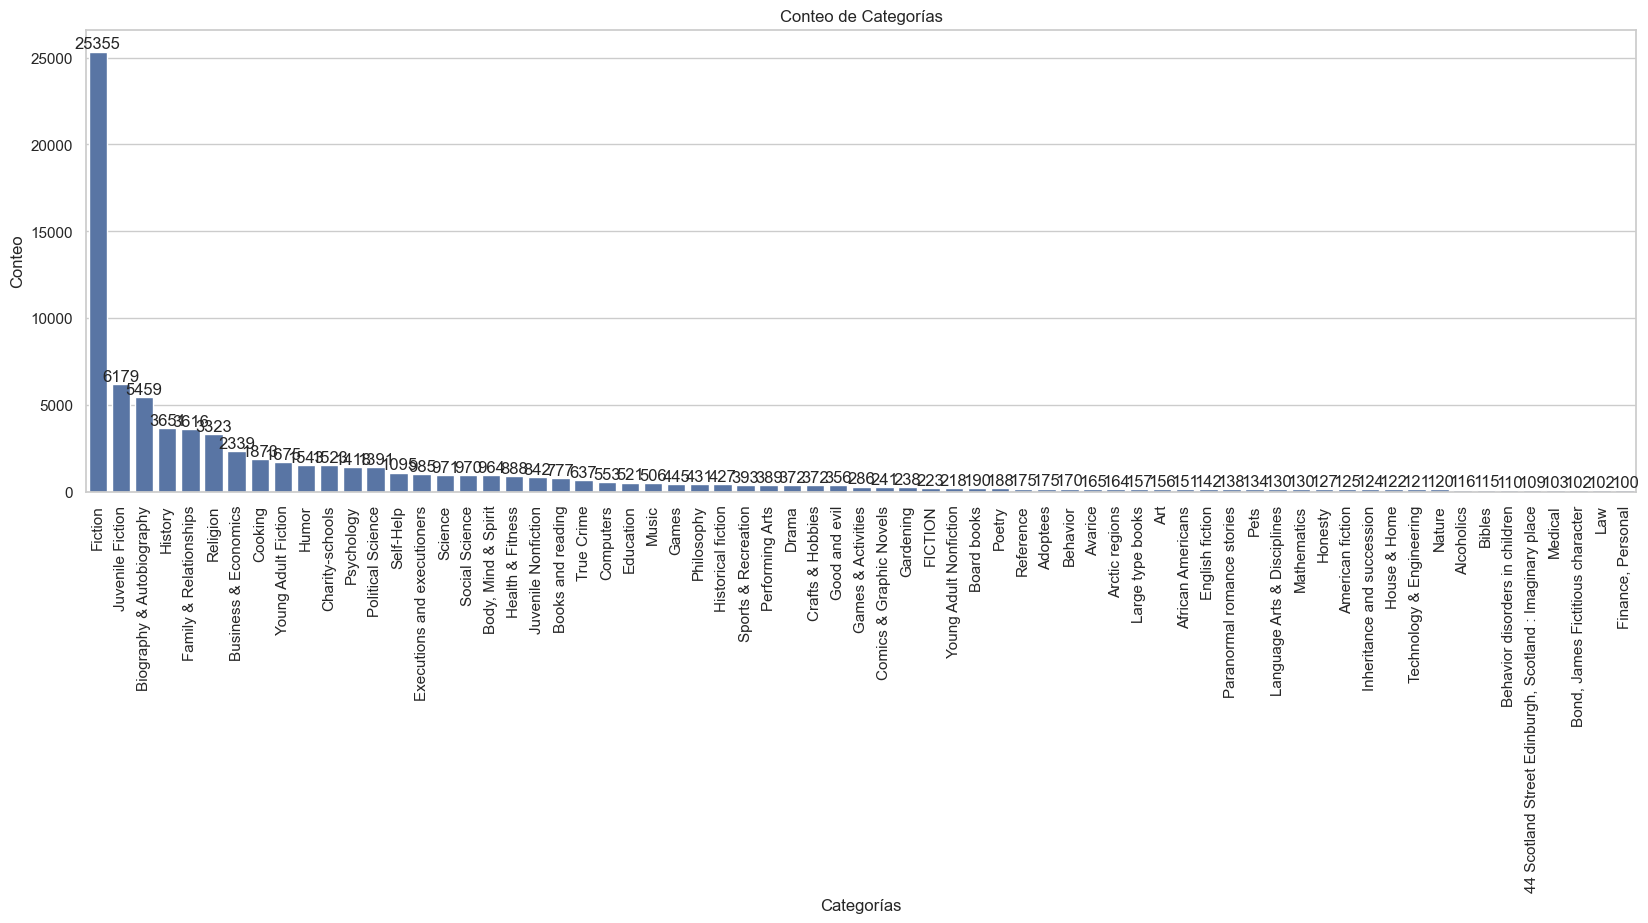

In [86]:
sns.set(style="whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional)
sns.barplot(x=conteo_categorias.index, y=conteo_categorias.values)

# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Categorías')
plt.ylabel('Conteo')
plt.title('Conteo de Categorías')
for i, v in enumerate(conteo_categorias.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Muestra el gráfico
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x (opcional)
plt.show()

### Conteo de títulos

C:\Users\emmag\AppData\Local\Temp\ipykernel_7760\931655692.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\emmag\AppData\Local\Temp\ipykernel_7760\931655692.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


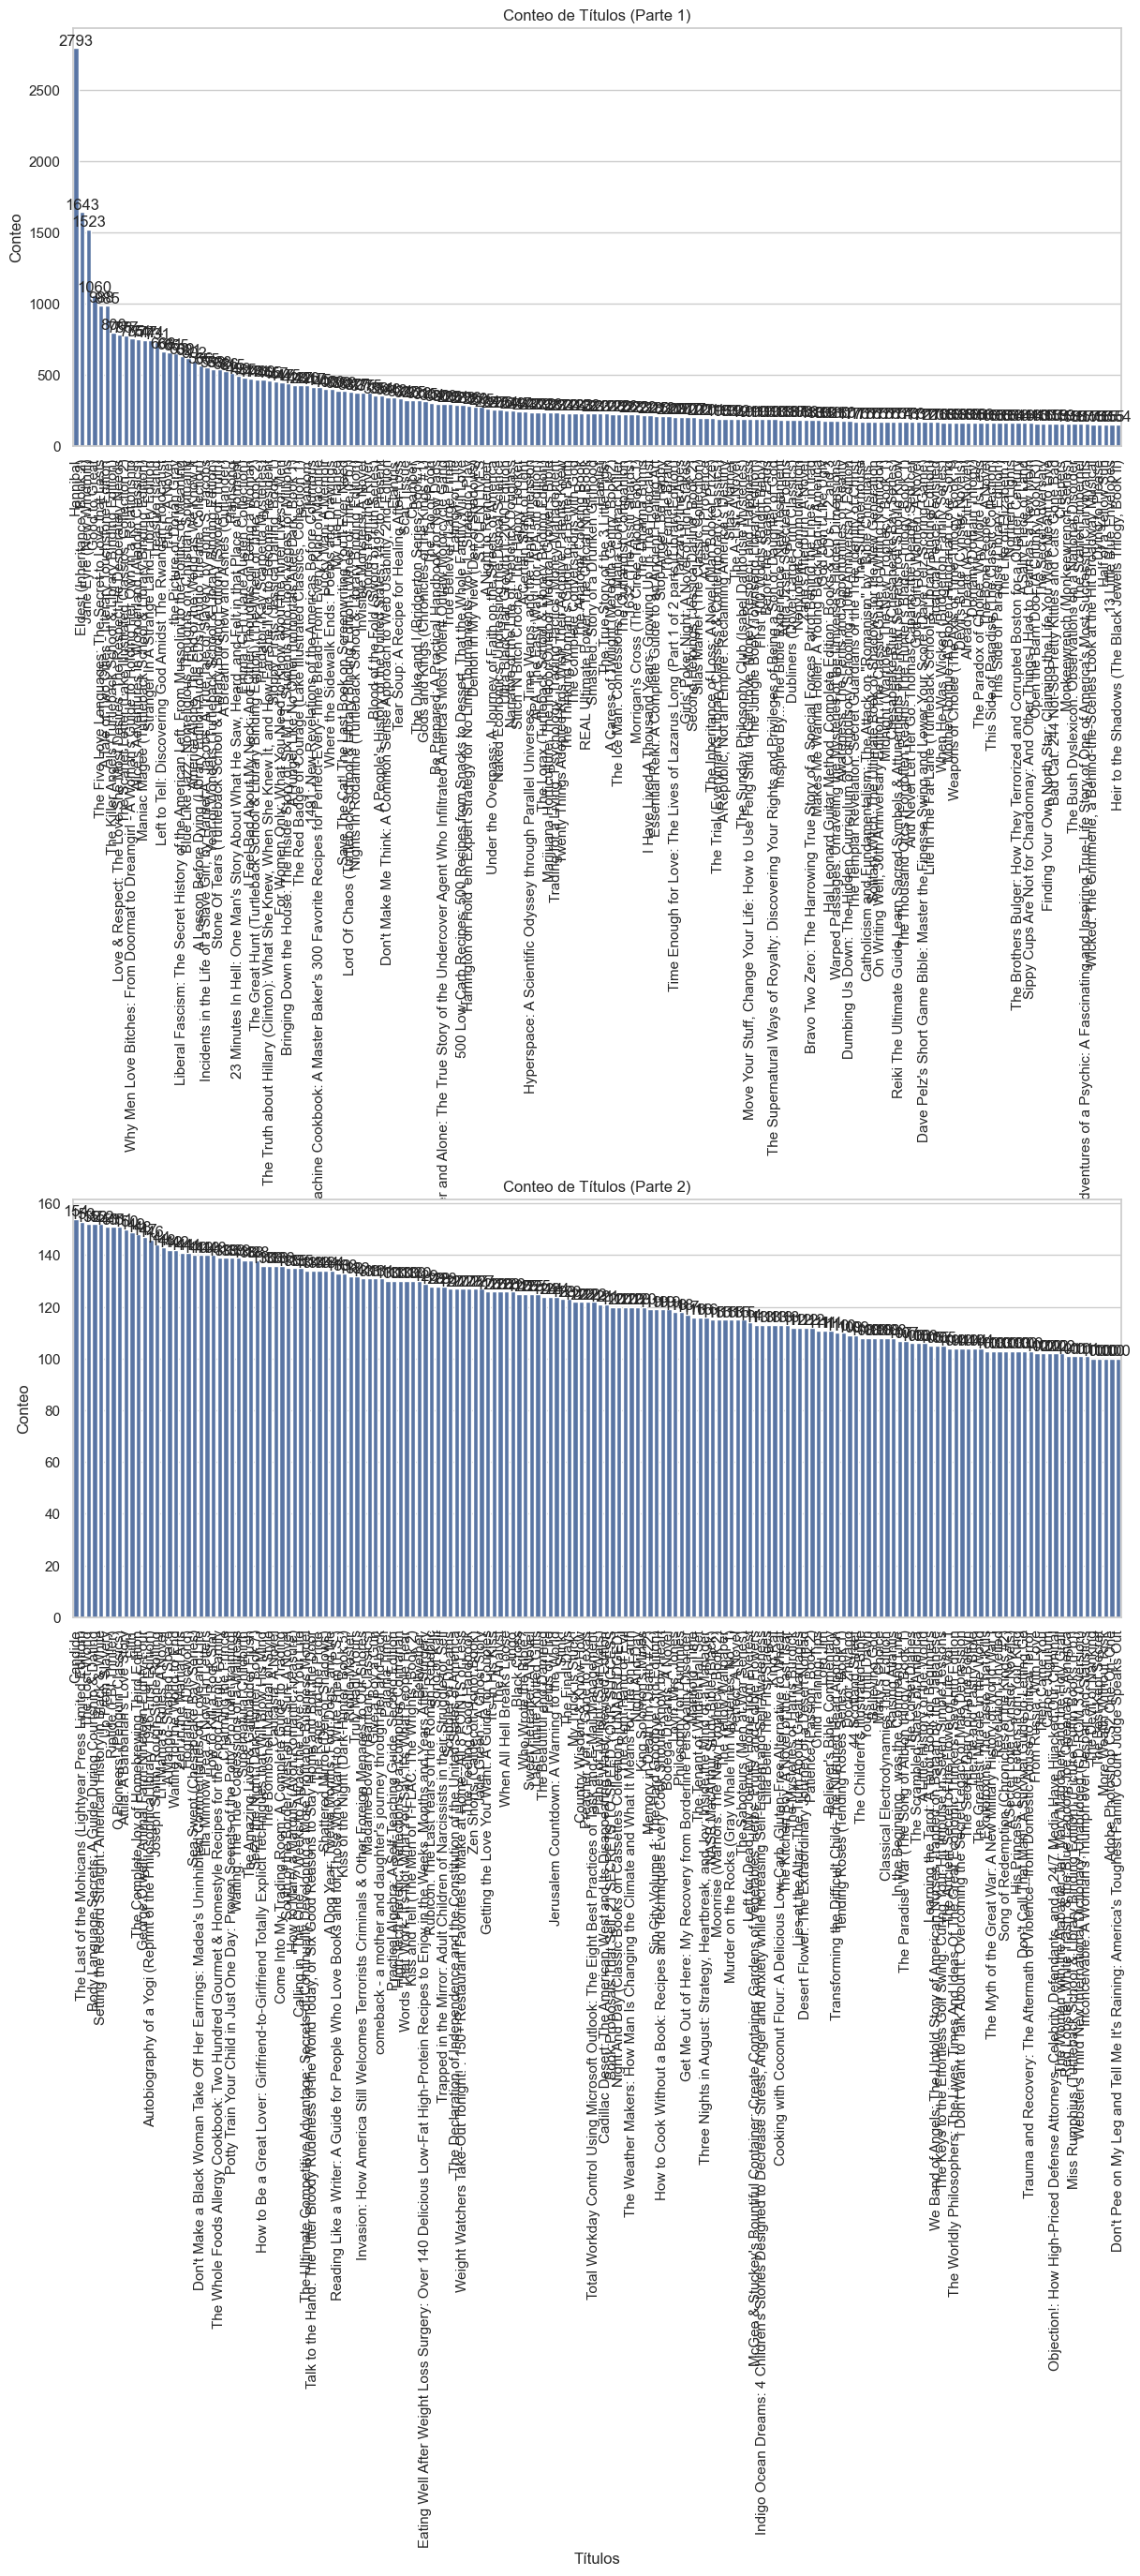

In [87]:
# Divide el conjunto de datos en dos partes
# Divide el conjunto de datos en dos partes
mitad = len(conteo_titulos) // 2
primer_conjunto = conteo_titulos[:mitad]
segundo_conjunto = conteo_titulos[mitad:]

# Crea una figura con dos filas y un solo subgráfico en cada fila
fig, axes = plt.subplots(2, 1, figsize=(18, 18))

# Subgráfico 1: Primer conjunto de datos
sns.barplot(x=primer_conjunto.index, y=primer_conjunto.values, ax=axes[0])
axes[0].set_xlabel('Títulos')
axes[0].set_ylabel('Conteo')
axes[0].set_title('Conteo de Títulos (Parte 1)')

# Agrega etiquetas con los valores en el primer subgráfico
for i, v in enumerate(primer_conjunto.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Subgráfico 2: Segundo conjunto de datos
sns.barplot(x=segundo_conjunto.index, y=segundo_conjunto.values, ax=axes[1])
axes[1].set_xlabel('Títulos')
axes[1].set_ylabel('Conteo')
axes[1].set_title('Conteo de Títulos (Parte 2)')

# Agrega etiquetas con los valores en el segundo subgráfico
for i, v in enumerate(segundo_conjunto.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom')

# Ajusta el espacio entre los subgráficos para mejorar la visualización
plt.tight_layout()

# Muestra los subgráficos
plt.subplots_adjust(hspace=1.8)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

### Conteo de editoriales

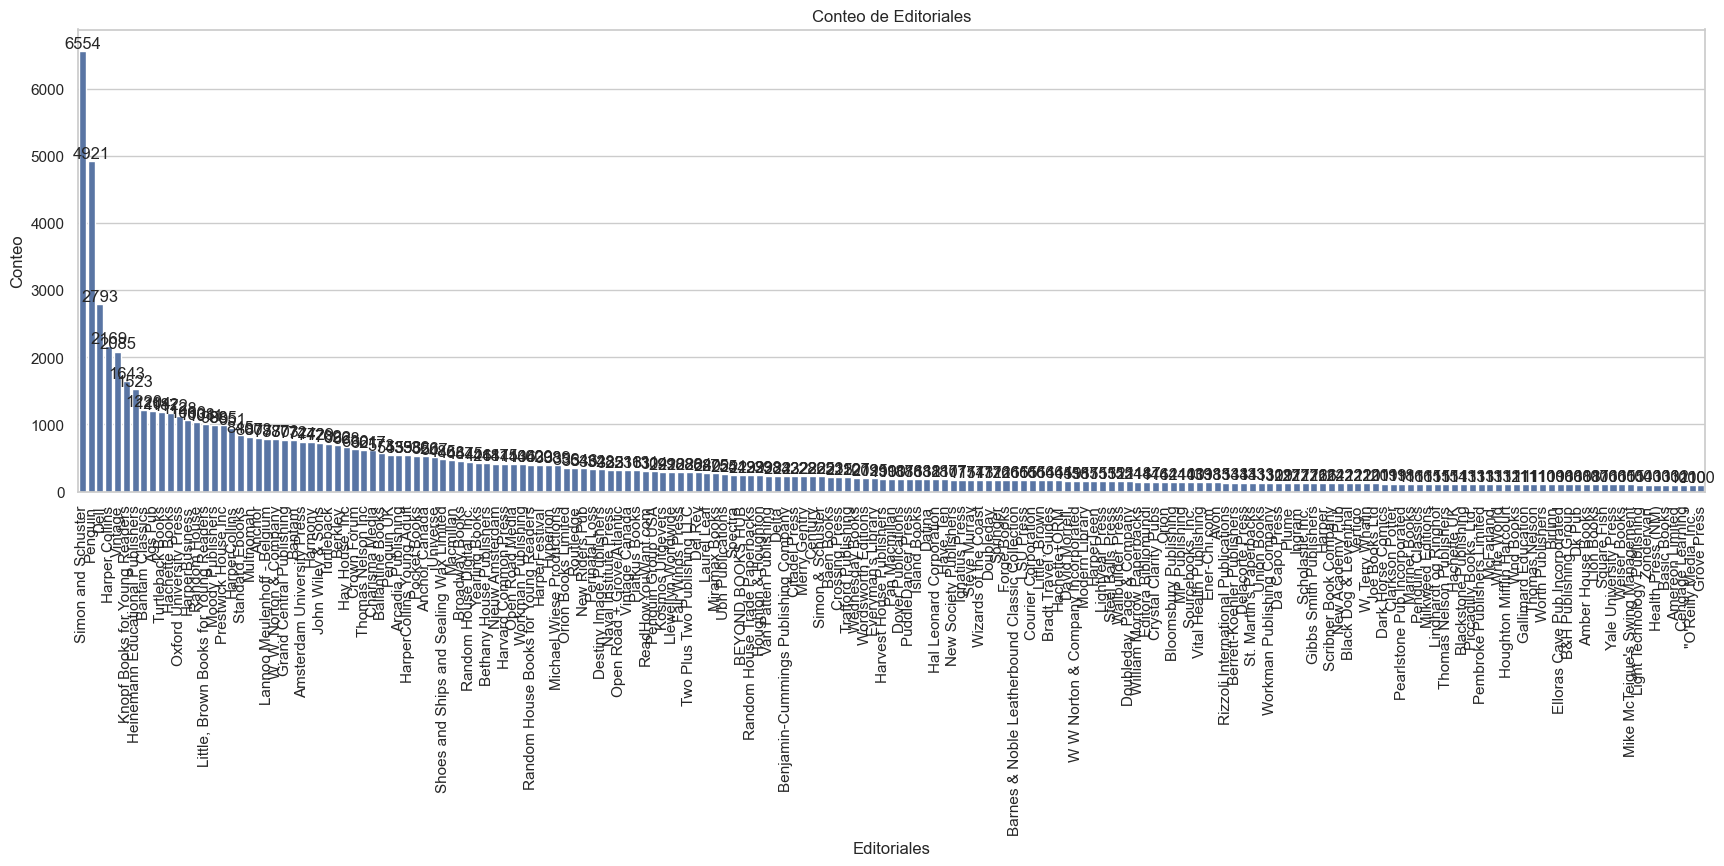

In [88]:
sns.set(style="whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(21, 6))  # Tamaño del gráfico (opcional)
sns.barplot(x=conteo_editoriales.index, y=conteo_editoriales.values)

# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Editoriales')
plt.ylabel('Conteo')
plt.title('Conteo de Editoriales')
for i, v in enumerate(conteo_editoriales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Muestra el gráfico
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x (opcional)
plt.show()

### Conteo de autores

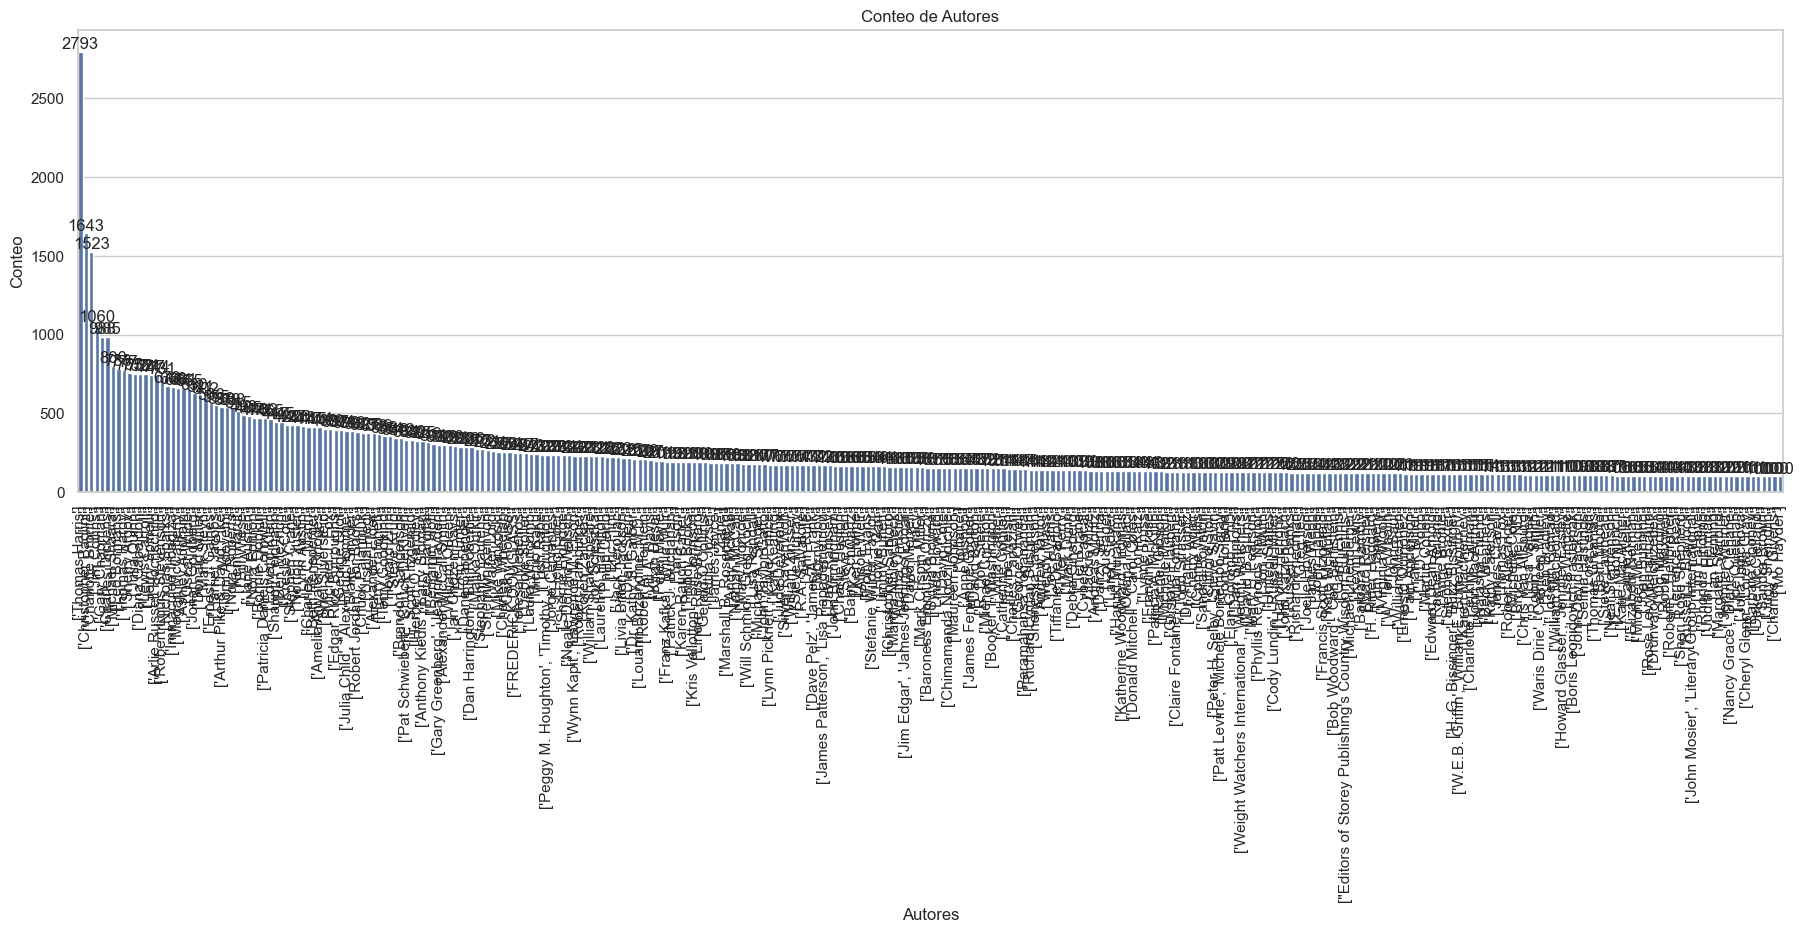

In [89]:
sns.set(style="whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(22, 6))  # Tamaño del gráfico (opcional)
sns.barplot(x=conteo_autores.index, y=conteo_autores.values)

# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Autores')
plt.ylabel('Conteo')
plt.title('Conteo de Autores')
for i, v in enumerate(conteo_autores.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Muestra el gráfico
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x (opcional)
plt.show()

### Conteo de fechas de publicación

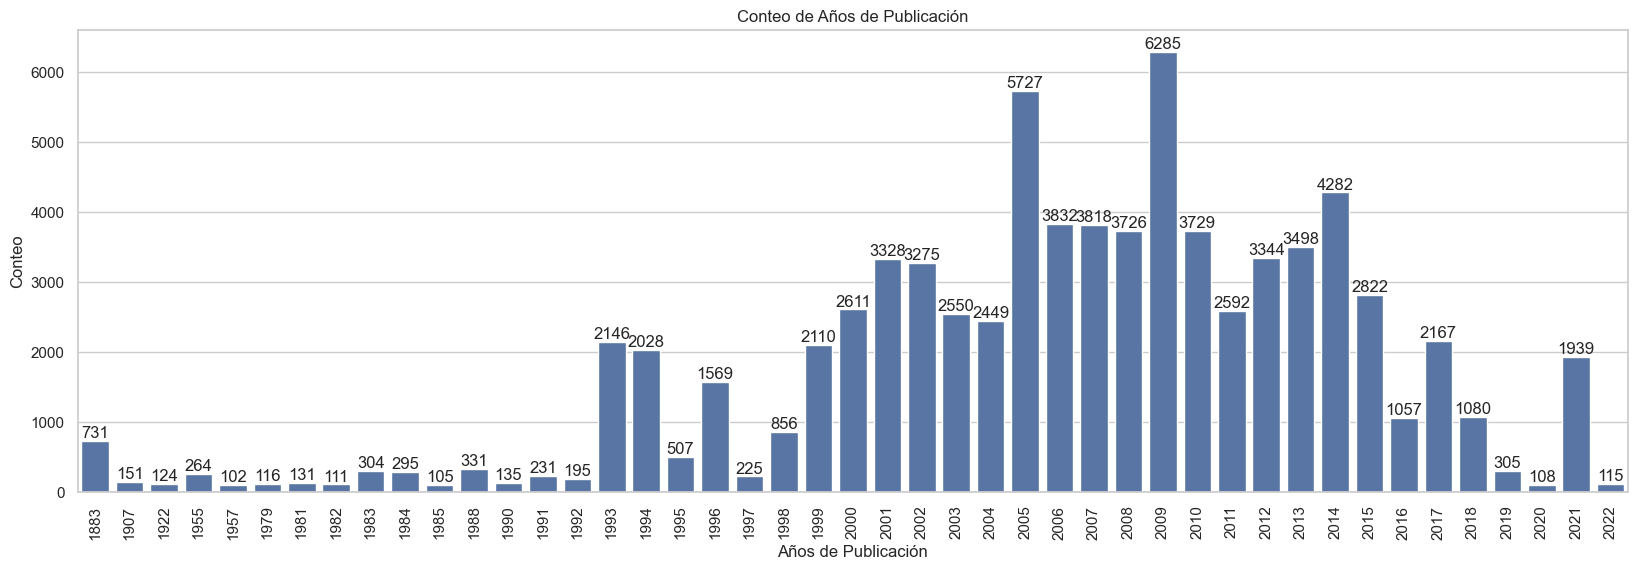

In [90]:
sns.set(style="whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional)
sns.barplot(x=conteo_fechas_publi.index, y=conteo_fechas_publi.values)

# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Años de Publicación')
plt.ylabel('Conteo')
plt.title('Conteo de Años de Publicación')
for i, v in enumerate(conteo_fechas_publi.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Muestra el gráfico
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje x (opcional)
plt.show()

### Histograma de Utilidad positiva de reseñas

In [91]:
max_conteo = df['review_helpfulness_up'].max()
rango = int(100 * ((max_conteo // 100) + 1))
binwidth = 100  # Ancho de intervalo personalizado
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional)
#sns.histplot(df['Price'], bins=20)  # kde=True para incluir una estimación de la densidad
ax = sns.histplot(df['review_helpfulness_up'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Cant. Votos Positivos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Votos Positivos de Reseña')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)
#sns.histplot(df['Price'], bins=50)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

In [92]:
df[df['review_helpfulness_up'] < np.percentile(df['review_helpfulness_up'], 98)]

Id  review/score  review/text                          Title  \
0      0312267932           4.0          620     When All Hell Breaks Loose   
1      0312267932           5.0          146     When All Hell Breaks Loose   
2      0312267932           4.0          429     When All Hell Breaks Loose   
3      0312267932           4.0          389     When All Hell Breaks Loose   
4      0312267932           4.0          101     When All Hell Breaks Loose   
...           ...           ...          ...                            ...   
77401  0312495412           4.0          867  First 100 Words (Bright Baby)   
77402  0312495412           1.0          302  First 100 Words (Bright Baby)   
77403  0312495412           4.0          110  First 100 Words (Bright Baby)   
77404  0312495412           5.0          399  First 100 Words (Bright Baby)   
77405  0312495412           5.0          253  First 100 Words (Bright Baby)   

                                 authors               publisher  \
0      ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers   
1      ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers   
2      ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers   
3      ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers   
4      ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers   
...                                  ...                     ...   
77401                   ['Priddy Books']           Pan Macmillan   
77402                   ['Priddy Books']           Pan Macmillan   
77403                   ['Priddy Books']           Pan Macmillan   
77404                   ['Priddy Books']           Pan Macmillan   
77405                   ['Priddy Books']           Pan Macmillan   

       publishedDate        categories  Price  conteo  review_helpfulness_up  \
0               2007  Health & Fitness  13.25     126                      0   
1               2007  Health & Fitness  13.25     126                      0   
2               2007  Health & Fitness  13.25     126                      0   
3               2007  Health & Fitness  13.25     126                      0   
4               2007  Health & Fitness  13.25     126                      0   
...              ...               ...    ...     ...                    ...   
77401           2005       Board books   8.05     190                      4   
77402           2005       Board books   8.05     190                      2   
77403           2005       Board books   8.05     190                      2   
77404           2005       Board books   8.05     190                      2   
77405           2005       Board books   8.05     190                      2   

       review_helpfulness_total  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
77401                         6  
77402                         3  
77403                         3  
77404                         3  
77405                         3  

[75836 rows x 12 columns]

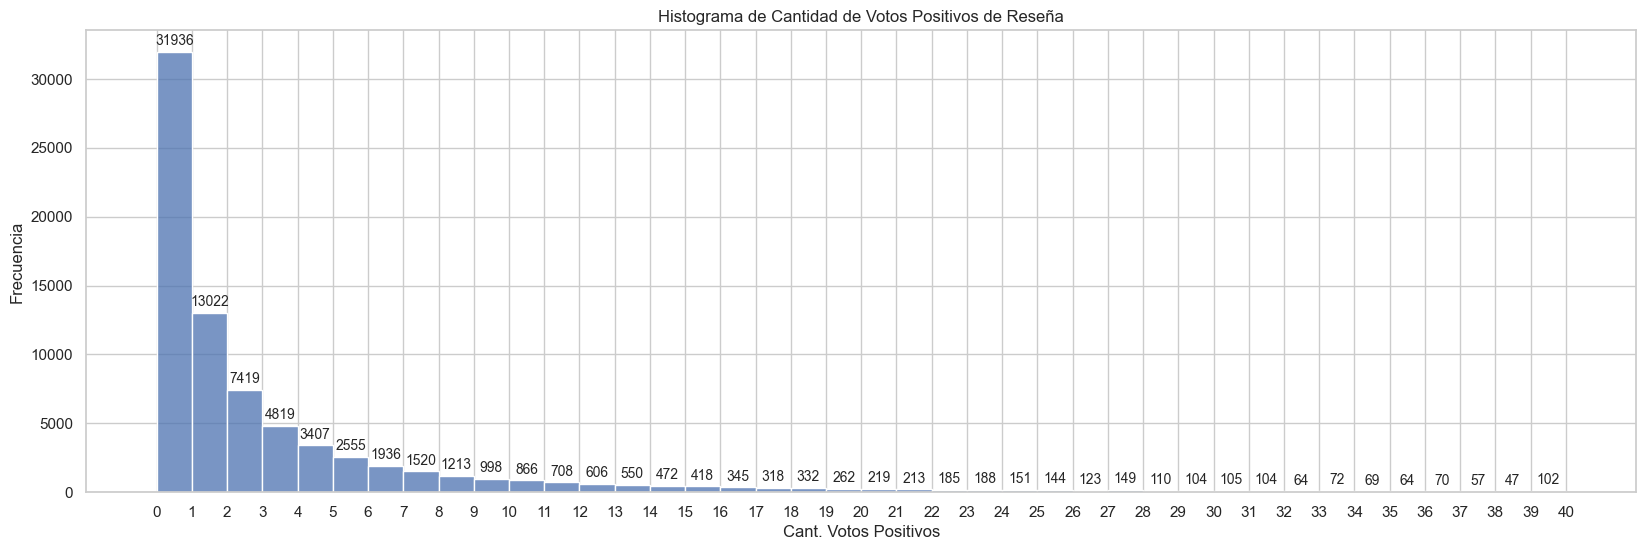

In [93]:
max_conteo = df[df['review_helpfulness_up'] < np.percentile(df['review_helpfulness_up'], 98)]['review_helpfulness_up'].max()
rango = int(10 * ((max_conteo // 10) + 1))
binwidth = 1  # Ancho de intervalo personalizado
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional)
#sns.histplot(df['Price'], bins=20)  # kde=True para incluir una estimación de la densidad
ax = sns.histplot(df[df['review_helpfulness_up'] <= 500]['review_helpfulness_up'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Cant. Votos Positivos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Votos Positivos de Reseña')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)
#sns.histplot(df['Price'], bins=50)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

### Histograma de votos totales por reseña

In [94]:
max_conteo = df['review_helpfulness_total'].max()
rango = int(100 * ((max_conteo // 100) + 1))
binwidth = 100  # Ancho de intervalo personalizado
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional)
#sns.histplot(df['Price'], bins=20)  # kde=True para incluir una estimación de la densidad
ax = sns.histplot(df['review_helpfulness_total'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Cant. Votos Totales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Votos Totales de Reseña')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)
#sns.histplot(df['Price'], bins=50)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

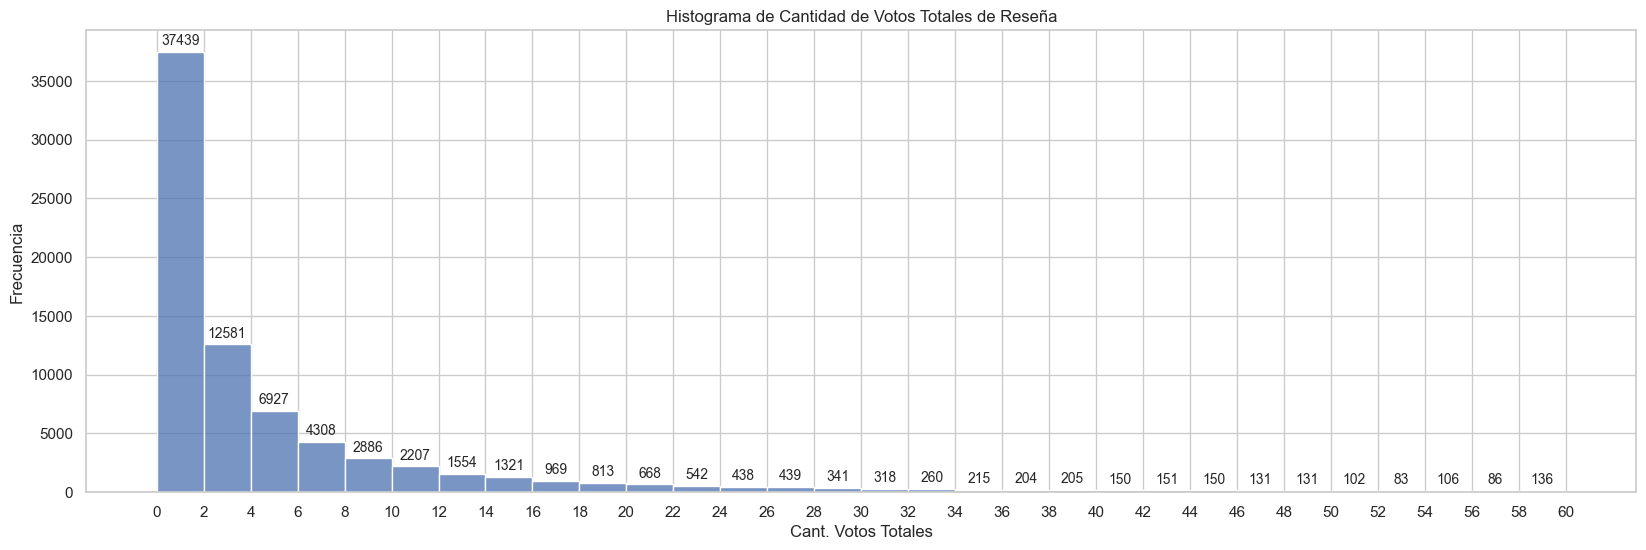

In [95]:
max_conteo = df[df['review_helpfulness_total'] < np.percentile(df['review_helpfulness_total'], 98)]['review_helpfulness_total'].max()
rango = int(10 * ((max_conteo // 10) + 1))
binwidth = 2  # Ancho de intervalo personalizado
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional)
#sns.histplot(df['Price'], bins=20)  # kde=True para incluir una estimación de la densidad
ax = sns.histplot(df[df['review_helpfulness_total'] <= 500]['review_helpfulness_total'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Cant. Votos Totales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Votos Totales de Reseña')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)
#sns.histplot(df['Price'], bins=50)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

### Histograma de cantidad de reseñas por libro

In [96]:
conteos = df.groupby('Id')['conteo'].mean()
conteos = pd.DataFrame(conteos)
max_conteo = conteos.max()
rango = int(100 * ((max_conteo // 100) + 1))
binwidth = 100  # Ancho de intervalo personalizado
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(20, 6))  # Tamaño del gráfico (opcional)
#sns.histplot(df['Price'], bins=20)  # kde=True para incluir una estimación de la densidad
ax = sns.histplot(conteos['conteo'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Cant. Reseñas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Reseñas por Libro')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)
#sns.histplot(df['Price'], bins=50)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

C:\Users\emmag\AppData\Local\Temp\ipykernel_7760\153142223.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  rango = int(100 * ((max_conteo // 100) + 1))


### Histograma de precios por libros

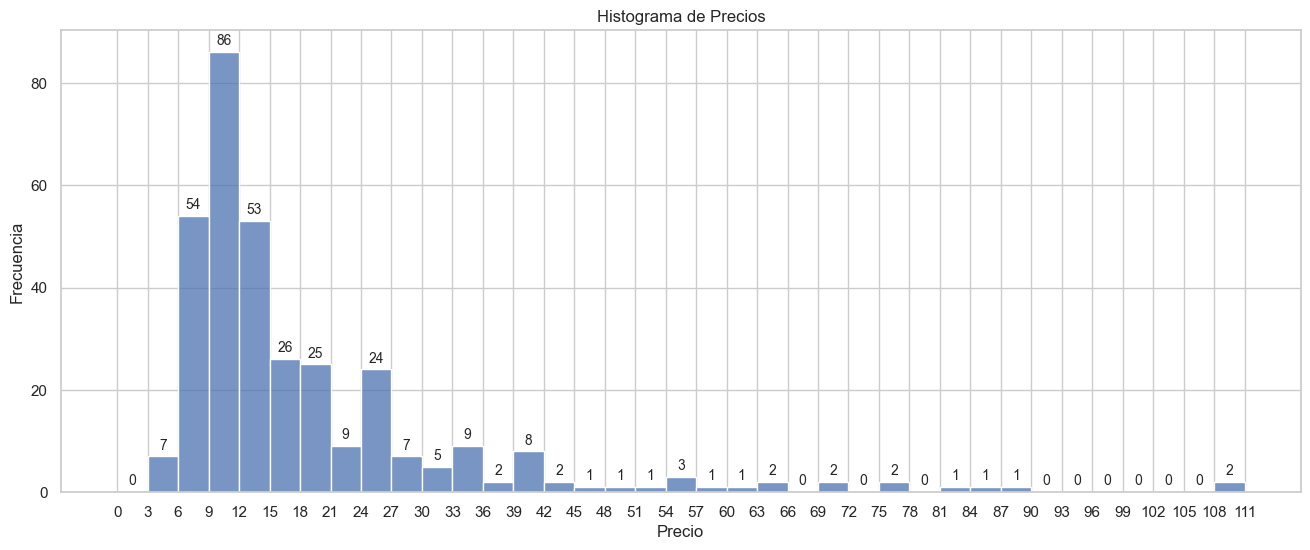

In [97]:
precios = df.groupby('Id')['Price'].mean()
precios = pd.DataFrame(precios)
max_price = precios['Price'].max()
rango = int(3 * ((max_price // 3) + 1))
binwidth = 3  # Ancho de intervalo personalizado
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(16, 6))  # Tamaño del gráfico (opcional)
#sns.histplot(df['Price'], bins=20)  # kde=True para incluir una estimación de la densidad
ax = sns.histplot(precios['Price'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)
#sns.histplot(df['Price'], bins=50)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

In [98]:
df[df['Price'] >= 105]

Id  review/score  review/text  \
45932  0786185945           3.0         1505   
45933  0786185945           3.0          979   
45934  0786185945           3.0         1191   
45935  0786185945           5.0         1613   
45936  0786185945           4.0         2118   
...           ...           ...          ...   
52945  0792728424           4.0          915   
52946  0792728424           3.0         1059   
52947  0792728424           3.0         1792   
52948  0792728424           5.0          703   
52949  0792728424           5.0          174   

                                                   Title  \
45932        Stranger In A Strange Land: Library Edition   
45933        Stranger In A Strange Land: Library Edition   
45934        Stranger In A Strange Land: Library Edition   
45935        Stranger In A Strange Land: Library Edition   
45936        Stranger In A Strange Land: Library Edition   
...                                                  ...   
52945  And Never Let Her Go: Thomas Capano, the Deadl...   
52946  And Never Let Her Go: Thomas Capano, the Deadl...   
52947  And Never Let Her Go: Thomas Capano, the Deadl...   
52948  And Never Let Her Go: Thomas Capano, the Deadl...   
52949  And Never Let Her Go: Thomas Capano, the Deadl...   

                            authors                   publisher  \
45932  ['Arlie Russell Hochschild']  Amsterdam University Press   
45933  ['Arlie Russell Hochschild']  Amsterdam University Press   
45934  ['Arlie Russell Hochschild']  Amsterdam University Press   
45935  ['Arlie Russell Hochschild']  Amsterdam University Press   
45936  ['Arlie Russell Hochschild']  Amsterdam University Press   
...                             ...                         ...   
52945                  ['Ann Rule']          Simon and Schuster   
52946                  ['Ann Rule']          Simon and Schuster   
52947                  ['Ann Rule']          Simon and Schuster   
52948                  ['Ann Rule']          Simon and Schuster   
52949                  ['Ann Rule']          Simon and Schuster   

       publishedDate      categories   Price  conteo  review_helpfulness_up  \
45932           2017  Social Science  108.00     744                      4   
45933           2017  Social Science  108.00     744                      4   
45934           2017  Social Science  108.00     744                      4   
45935           2017  Social Science  108.00     744                      4   
45936           2017  Social Science  108.00     744                      4   
...              ...             ...     ...     ...                    ...   
52945           2000      True Crime  110.95     173                      1   
52946           2000      True Crime  110.95     173                      1   
52947           2000      True Crime  110.95     173                      1   
52948           2000      True Crime  110.95     173                      1   
52949           2000      True Crime  110.95     173                      0   

       review_helpfulness_total  
45932                         5  
45933                         5  
45934                         5  
45935                         5  
45936                         5  
...                         ...  
52945                         3  
52946                         3  
52947                         3  
52948                         3  
52949                         2  

[917 rows x 12 columns]

### Histograma de longitud de reseñas

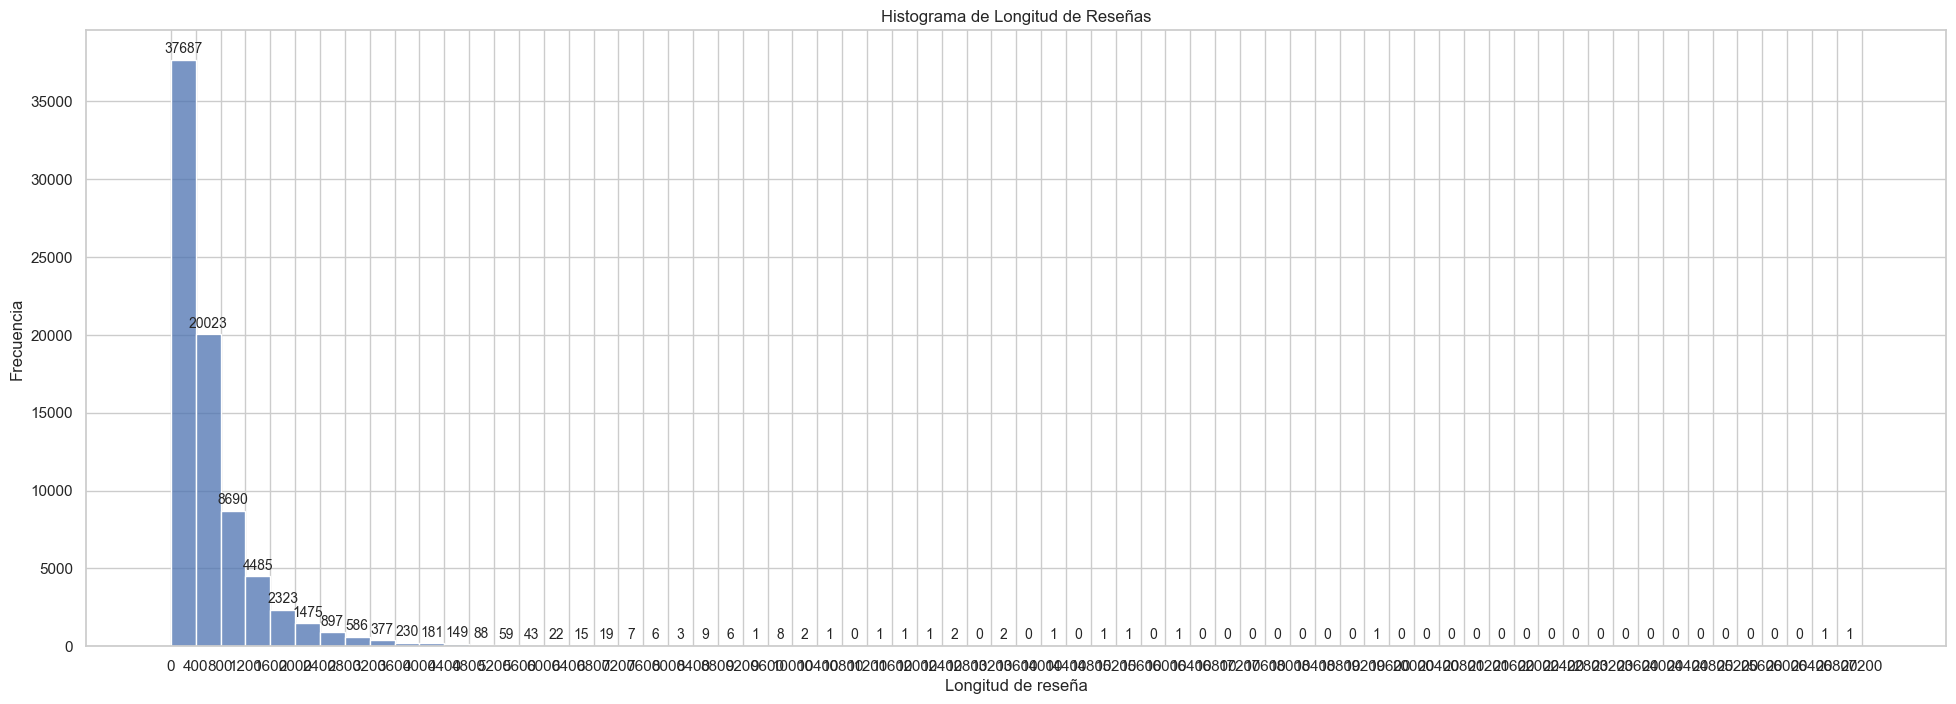

In [99]:
max_length = df['review/text'].max()
rango = int(400 * ((max_length // 400) + 1))
binwidth = 400  # Ancho de intervalo personalizado
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(24, 8))  # Tamaño del gráfico (opcional)

ax = sns.histplot(df['review/text'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Longitud de reseña')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud de Reseñas')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

In [100]:
# porc = np.percentile(df['review/text'], 98)
porc = 30
max_length = np.percentile(df['review/text'], 98)
int(porc * ((max_length // porc) + 1))
np.percentile(df['review/text'], 98)

2972.0

In [101]:
# max_length = df['review/text'].max()
max_length = np.percentile(df['review/text'], 98)
binwidth = 100  # Ancho de intervalo personalizado
rango = int(binwidth * ((max_length // binwidth) + 1))
binrange = (0, rango)  # Rango de intervalos personalizado
plt.figure(figsize=(24, 8))  # Tamaño del gráfico (opcional)

ax = sns.histplot(df[df['review/text'] < np.percentile(df['review/text'], 98)]['review/text'], binwidth=binwidth, binrange=binrange)
# Configura las etiquetas de los ejes y el título (opcional)
plt.xlabel('Longitud de reseña')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud de Reseñas')
etiquetas_x = [i for i in range(binrange[0], binrange[1] + binwidth, binwidth)]
plt.xticks(etiquetas_x)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Muestra el histograma
plt.show()

In [102]:
df[df['review/text'] >= 4800 ].sort_values('review/text')

Id  review/score  review/text  \
17646  1423308980           3.0         4801   
57428  1563892618           3.0         4804   
14016  1591858828           1.0         4805   
43378  1593974477           3.0         4806   
10785  140013188X           4.0         4810   
...           ...           ...          ...   
48393  0060838655           2.0        15364   
30944  0385511841           5.0        16340   
55882  1579570003           1.0        19240   
6363   1419390686           5.0        26687   
16204  0764120840           5.0        26824   

                                                   Title  \
17646      Morrigan's Cross (The Circle Trilogy, Book 1)   
57428                     Preacher Vol. 1: Gone to Texas   
14016  23 Minutes In Hell: One Man's Story About What...   
43378     Getting the Love You Want: A Guide for Couples   
10785  The Brothers Bulger: How They Terrorized and C...   
...                                                  ...   
48393  A People's History of the United States: 1492 ...   
30944  Liberal Fascism: The Secret History of the Ame...   
55882                                Child Training Tips   
6363   The Weather Makers: How Man Is Changing the Cl...   
16204                                             Hamlet   

                       authors                   publisher  publishedDate  \
17646         ['Nora Roberts']                     Berkley           2016   
57428          ['Garth Ennis']                     Vertigo           2014   
14016           ['Bill Wiese']              Charisma Media           2010   
43378     ['Harville Hendrix']                   Macmillan           2001   
10785           ['Howie Carr']                Hachette+ORM           2007   
...                        ...                         ...            ...   
48393          ['Howard Zinn']                   Routledge           2015   
30944       ['Jonah Goldberg']                 Crown Forum           2009   
55882          ['Reb Bradley']                   Wnd Books           2014   
6363          ['Tim Flannery']  Open Road + Grove/Atlantic           2007   
16204  ['William Shakespeare']             Bantam Classics           1988   

                    categories  Price  conteo  review_helpfulness_up  \
17646                  FICTION  32.95     223                      5   
57428  Comics & Graphic Novels  12.23     122                      4   
14016                 Religion  10.39     493                     16   
43378   Family & Relationships  12.21     126                     16   
10785               True Crime  51.09     164                      0   
...                        ...    ...     ...                    ...   
48393                  History  12.03     354                     13   
30944                  History  18.97     630                     25   
55882   Family & Relationships   8.00     111                     30   
6363                    Nature  33.44     120                      5   
16204                    Drama   7.06     231                      1   

       review_helpfulness_total  
17646                         5  
57428                        13  
14016                        29  
43378                        81  
10785                         0  
...                         ...  
48393                        22  
30944                        38  
55882                        59  
6363                         11  
16204                         1  

[303 rows x 12 columns]

### Resumen de los datos resultantes

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77406 entries, 0 to 77405
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        77406 non-null  object 
 1   review/score              77406 non-null  float64
 2   review/text               77406 non-null  int64  
 3   Title                     77406 non-null  object 
 4   authors                   77406 non-null  object 
 5   publisher                 77406 non-null  object 
 6   publishedDate             77406 non-null  int64  
 7   categories                77406 non-null  object 
 8   Price                     77406 non-null  float64
 9   conteo                    77406 non-null  int64  
 10  review_helpfulness_up     77406 non-null  int64  
 11  review_helpfulness_total  77406 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.1+ MB


In [104]:
distribucion_categorias = df['categories'].value_counts().sort_index()
distribucion_categorias.sort_values(ascending=False)

categories
Fiction                                                     25355
Juvenile Fiction                                             6179
Biography & Autobiography                                    5459
History                                                      3651
Family & Relationships                                       3616
                                                            ...  
44 Scotland Street Edinburgh, Scotland : Imaginary place      109
Medical                                                       103
Bond, James Fictitious character                              102
Law                                                           102
Finance, Personal                                             100
Name: count, Length: 67, dtype: int64

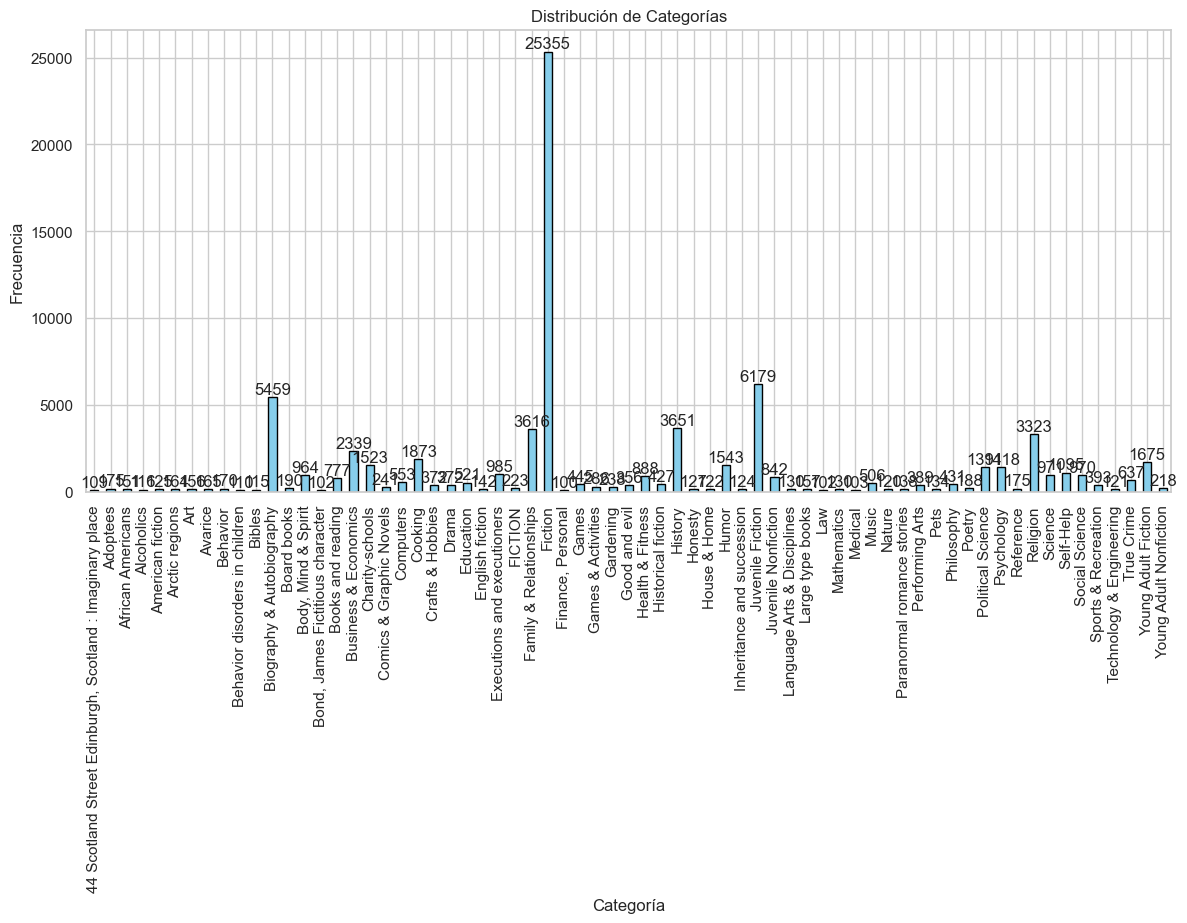

In [105]:
plt.figure(figsize=(14, 6))
ax = distribucion_categorias.plot(kind='bar', color='skyblue', edgecolor='black')

# Agrega etiquetas con el recuento en cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías')

# Muestra el gráfico de barras
plt.show()

In [106]:
distribucion_autores = df['authors'].value_counts().sort_index()
distribucion_autores.sort_values(ascending=False)

authors
['Thomas Harris']          2793
['Christopher Paolini']    1643
['Charlotte Brontë']       1523
['Jim Collins']            1060
['Gary Chapman']            988
                           ... 
['Charles J. Givens']       100
['Sandra Brown']            100
['Deke McClelland']         100
['Judy Sheindlin']          100
['Mo Hayder']               100
Name: count, Length: 314, dtype: int64

In [107]:
plt.figure(figsize=(16, 6))
ax = distribucion_autores.plot(kind='bar', color='skyblue', edgecolor='black')

# Agrega etiquetas con el recuento en cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Autores')

# Muestra el gráfico de barras
plt.show()

In [108]:
distribucion_precios = df['Price'].value_counts().sort_index()
distribucion_precios.sort_values(ascending=False)

Price
7.67     2793
33.97    1643
14.02    1523
10.20    1467
13.80    1271
         ... 
17.95     101
10.07     100
18.47     100
29.16     100
9.48      100
Name: count, Length: 260, dtype: int64

### Almacenamiento del conjunto de datos final:

In [109]:
df.to_csv('data/reviews_final.csv', index=False)
# df_cod_num.to_csv('data/reviews_final_ordinal.csv', index=False)
#df_one_hot.to_csv('data/reviews_final_one_hot.csv', index=False)

## Codificación de variables categóricas

In [110]:
df = pd.read_csv('data/reviews_final.csv')

In [111]:
df.count()

Id                          77406
review/score                77406
review/text                 77406
Title                       77406
authors                     77406
publisher                   77406
publishedDate               77406
categories                  77406
Price                       77406
conteo                      77406
review_helpfulness_up       77406
review_helpfulness_total    77406
dtype: int64

In [112]:
df.head(10)

Id  review/score  review/text                       Title  \
0  0312267932           4.0          620  When All Hell Breaks Loose   
1  0312267932           5.0          146  When All Hell Breaks Loose   
2  0312267932           4.0          429  When All Hell Breaks Loose   
3  0312267932           4.0          389  When All Hell Breaks Loose   
4  0312267932           4.0          101  When All Hell Breaks Loose   
5  0312267932           4.0          717  When All Hell Breaks Loose   
6  0312267932           3.0          326  When All Hell Breaks Loose   
7  0312267932           5.0          393  When All Hell Breaks Loose   
8  0312267932           5.0          276  When All Hell Breaks Loose   
9  0312267932           5.0          198  When All Hell Breaks Loose   

                             authors               publisher  publishedDate  \
0  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
1  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
2  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
3  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
4  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
5  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
6  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
7  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
8  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   
9  ['Cody Lundin', 'Russell Miller']  Gibbs Smith Publishers           2007   

         categories  Price  conteo  review_helpfulness_up  \
0  Health & Fitness  13.25     126                      0   
1  Health & Fitness  13.25     126                      0   
2  Health & Fitness  13.25     126                      0   
3  Health & Fitness  13.25     126                      0   
4  Health & Fitness  13.25     126                      0   
5  Health & Fitness  13.25     126                      0   
6  Health & Fitness  13.25     126                      0   
7  Health & Fitness  13.25     126                      0   
8  Health & Fitness  13.25     126                      0   
9  Health & Fitness  13.25     126                      0   

   review_helpfulness_total  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
5                         0  
6                         0  
7                         0  
8                         0  
9                         0

### Separación de los dataframes para probar las distintas hipótesis

In [113]:
df_cod_price = df.copy()
df_cod_authors = df.copy()
df_cod_rating = df.copy()

### Codificación para hipótesis Precio

In [114]:
#columnas_one_hot = ['authors', 'publisher', 'categories']
columnas_one_hot = ['publisher', 'categories']
df_cod_price = pd.get_dummies(df_cod_price, columns=columnas_one_hot)
df_cod_price = df_cod_price.drop(columns=['Id', 'Title', 'authors'])

df_cod_price.head(10)

review/score  review/text  publishedDate  Price  conteo  \
0           4.0          620           2007  13.25     126   
1           5.0          146           2007  13.25     126   
2           4.0          429           2007  13.25     126   
3           4.0          389           2007  13.25     126   
4           4.0          101           2007  13.25     126   
5           4.0          717           2007  13.25     126   
6           3.0          326           2007  13.25     126   
7           5.0          393           2007  13.25     126   
8           5.0          276           2007  13.25     126   
9           5.0          198           2007  13.25     126   

   review_helpfulness_up  review_helpfulness_total  \
0                      0                         0   
1                      0                         0   
2                      0                         0   
3                      0                         0   
4                      0                         0   
5                      0                         0   
6                      0                         0   
7                      0                         0   
8                      0                         0   
9                      0                         0   

   publisher_"O'Reilly Media, Inc."  publisher_Ags Pub  \
0                             False              False   
1                             False              False   
2                             False              False   
3                             False              False   
4                             False              False   
5                             False              False   
6                             False              False   
7                             False              False   
8                             False              False   
9                             False              False   

   publisher_Amber House Books  ...  categories_Reference  \
0                        False  ...                 False   
1                        False  ...                 False   
2                        False  ...                 False   
3                        False  ...                 False   
4                        False  ...                 False   
5                        False  ...                 False   
6                        False  ...                 False   
7                        False  ...                 False   
8                        False  ...                 False   
9                        False  ...                 False   

   categories_Religion  categories_Science  categories_Self-Help  \
0                False               False                 False   
1                False               False                 False   
2                False               False                 False   
3                False               False                 False   
4                False               False                 False   
5                False               False                 False   
6                False               False                 False   
7                False               False                 False   
8                False               False                 False   
9                False               False                 False   

   categories_Social Science  categories_Sports & Recreation  \
0                      False                           False   
1                      False                           False   
2                      False                           False   
3                      False                           False   
4                      False                           False   
5                      False                           False   
6                      False                           False   
7                      False                           False   
8                      False                           False   
9                      Fa

#### Separación del formato de lista de autores y codificación one-hot para cada autor individual

In [115]:
df_cod_price.sample(n=100, random_state=23)

review/score  review/text  publishedDate  Price  conteo  \
19076           5.0          532           2015  20.00     342   
59404           5.0         1902           2011  18.96     159   
73030           5.0          188           2001  26.95    1060   
20737           1.0           80           2012   4.99     751   
22736           3.0          936           2000  11.70     130   
...             ...          ...            ...    ...     ...   
27190           2.0          357           2009   7.67    2793   
1504            5.0          910           2002  10.85     755   
60329           4.0          139           2007  33.97    1643   
76161           5.0          427           2013  13.64     783   
58709           4.0          594           2007  17.04     201   

       review_helpfulness_up  review_helpfulness_total  \
19076                     13                        18   
59404                      1                         1   
73030                      3                         5   
20737                      4                         7   
22736                      0                         0   
...                      ...                       ...   
27190                      0                         0   
1504                       3                         3   
60329                      0                         3   
76161                      6                         7   
58709                      1                         1   

       publisher_"O'Reilly Media, Inc."  publisher_Ags Pub  \
19076                             False              False   
59404                             False              False   
73030                             False              False   
20737                             False              False   
22736                             False              False   
...                                 ...                ...   
27190                             False              False   
1504                              False              False   
60329                             False              False   
76161                             False              False   
58709                             False              False   

       publisher_Amber House Books  ...  categories_Reference  \
19076                        False  ...                 False   
59404                        False  ...                 False   
73030                        False  ...                 False   
20737                        False  ...                 False   
22736                        False  ...                 False   
...                            ...  ...                   ...   
27190                        False  ...                 False   
1504                         False  ...                 False   
60329                        False  ...                 False   
76161                        False  ...                 False   
58709                        False  ...                 False   

       categories_Religion  categories_Science  categories_Self-Help  \
19076                False               False                 False   
59404                False               False                 False   
73030                False               False                 False   
20737                False               False                 False   
22736                False               False                 False   
...                    ...                 ...                   ...   
27190                False               False                 False   
1504                 False               False                 False   
60329                False               False                 False   
76161                False               False                 False   
58709                False               False                 False   

       categories_Social Science  categories_Sports & Recreation  \
19076                      False                          

#### Transformación logarítmica para características con outliers
Se aplica una transformación logarítmica a las columnas con mucha asímetría para reducir el impacto de los valores atípicos sin recurrir a la eliminación de los datos.
No se tiene en cuenta la columna "conteo" por una cuestión de que es un campo calculado a partir de todas las reseñas para cada libro y aplicarle la transformación podría tener un impacto significativo. Cuando se haga la clasificación/predicción habría que probar aplicar la transformación a esa columna también y comparar resultados.

In [119]:
columnas_transf_log = ['review/text','review_helpfulness_up', 'review_helpfulness_total']

for columna in columnas_transf_log:
    df_cod_price[columna] = np.log(df_cod_price[columna] + 1)

In [120]:
df_cod_price.head(2)

review/score  review/text  publishedDate  Price  conteo  \
0           4.0     6.431331           2007  13.25     126   
1           5.0     4.990433           2007  13.25     126   

   review_helpfulness_up  review_helpfulness_total  \
0                    0.0                       0.0   
1                    0.0                       0.0   

   publisher_"O'Reilly Media, Inc."  publisher_Ags Pub  \
0                             False              False   
1                             False              False   

   publisher_Amber House Books  ...  categories_Reference  \
0                        False  ...                 False   
1                        False  ...                 False   

   categories_Religion  categories_Science  categories_Self-Help  \
0                False               False                 False   
1                False               False                 False   

   categories_Social Science  categories_Sports & Recreation  \
0                      False                           False   
1                      False                           False   

   categories_Technology & Engineering  categories_True Crime  \
0                                False                  False   
1                                False                  False   

   categories_Young Adult Fiction  categories_Young Adult Nonfiction  
0                           False                              False  
1                           False                              False  

[2 rows x 259 columns]

#### Normalización z-score
Se estandarizan las variables numéricas para realizar la regresión del precio.

In [121]:
from sklearn.preprocessing import StandardScaler
columnas_z_score = ['review/text','review/score', 'conteo', 'review_helpfulness_up', 'review_helpfulness_total', 'publishedDate']

scaler = StandardScaler()

# Aplicar la normalización z-score a las columnas seleccionadas
df_cod_price[columnas_z_score] = scaler.fit_transform(df_cod_price[columnas_z_score])

df_cod_price.head(20)

review/score  review/text  publishedDate  Price    conteo  \
0      -0.140123     0.415234       0.138193  13.25 -0.623558   
1       0.657171    -1.113057       0.138193  13.25 -0.623558   
2      -0.140123     0.025396       0.138193  13.25 -0.623558   
3      -0.140123    -0.078165       0.138193  13.25 -0.623558   
4      -0.140123    -1.500682       0.138193  13.25 -0.623558   
5      -0.140123     0.569175       0.138193  13.25 -0.623558   
6      -0.937418    -0.265037       0.138193  13.25 -0.623558   
7       0.657171    -0.067342       0.138193  13.25 -0.623558   
8       0.657171    -0.441044       0.138193  13.25 -0.623558   
9       0.657171    -0.791815       0.138193  13.25 -0.623558   
10      0.657171     0.554299       0.138193  13.25 -0.623558   
11      0.657171     0.673216       0.138193  13.25 -0.623558   
12     -0.140123    -0.922085       0.138193  13.25 -0.623558   
13      0.657171    -1.719317       0.138193  13.25 -0.623558   
14     -0.937418     0.455453       0.138193  13.25 -0.623558   
15     -1.734712     0.261086       0.138193  13.25 -0.623558   
16      0.657171    -1.420595       0.138193  13.25 -0.623558   
17     -0.140123     0.276771       0.138193  13.25 -0.623558   
18     -0.140123     0.307461       0.138193  13.25 -0.623558   
19      0.657171     0.025396       0.138193  13.25 -0.623558   

    review_helpfulness_up  review_helpfulness_total  \
0               -0.888768                 -1.014195   
1               -0.888768                 -1.014195   
2               -0.888768                 -1.014195   
3               -0.888768                 -1.014195   
4               -0.888768                 -1.014195   
5               -0.888768                 -1.014195   
6               -0.888768                 -1.014195   
7               -0.888768                 -1.014195   
8               -0.888768                 -1.014195   
9               -0.888768                 -1.014195   
10               0.153242                 -0.083291   
11               0.637749                  0.504043   
12              -0.231333                 -0.426860   
13              -0.231333                 -0.426860   
14              -0.231333                 -0.426860   
15              -0.231333                 -0.426860   
16              -0.231333                 -0.426860   
17              -0.231333                 -0.426860   
18              -0.231333                 -0.426860   
19              -0.231333                 -0.426860   

    publisher_"O'Reilly Media, Inc."  publisher_Ags Pub  \
0                              False              False   
1                              False              False   
2                              False              False   
3                              False              False   
4                              False              False   
5                              False              False   
6                              False              False   
7                              False              False   
8                              False              False   
9                              False              False   
10                             False              False   
11                             False              False   
12                             False              False   
13                             False              False   
14                             False              False   
15                             False              False   
16                             False              False   
17                             False              False   
18                             False              False   
19                             False              False   

    publisher_Amber House Books  ...  categories_Reference  \
0                         False  ...                 False   
1                         False  ...                 False   
2                         False  ...                 Fal

### Codificación para hipótesis Autores

In [122]:
#columnas_one_hot_autores = ['publisher', 'categories']
#df_cod_authors = pd.get_dummies(df_cod_authors, columns=columnas_one_hot_autores)
#df_cod_authors.head(10)

In [123]:
'''columnas_transf_log_authors = ['review/text','review_helpfulness_up', 'review_helpfulness_total']

for columna in columnas_transf_log_authors:
    df_cod_authors[columna] = np.log(df_cod_authors[columna] + 1)

df_cod_authors.head(20)'''

"columnas_transf_log_authors = ['review/text','review_helpfulness_up', 'review_helpfulness_total']\n\nfor columna in columnas_transf_log_authors:\n    df_cod_authors[columna] = np.log(df_cod_authors[columna] + 1)\n\ndf_cod_authors.head(20)"

In [124]:
autores_unicos = df_cod_authors['authors'].unique()
autor_a_numero = {autor: num for num, autor in enumerate(autores_unicos)}

df_cod_authors['authors'] = df_cod_authors['authors'].map(autor_a_numero)
df_cod_authors.head(20)

Id  review/score  review/text                       Title  \
0   0312267932           4.0          620  When All Hell Breaks Loose   
1   0312267932           5.0          146  When All Hell Breaks Loose   
2   0312267932           4.0          429  When All Hell Breaks Loose   
3   0312267932           4.0          389  When All Hell Breaks Loose   
4   0312267932           4.0          101  When All Hell Breaks Loose   
5   0312267932           4.0          717  When All Hell Breaks Loose   
6   0312267932           3.0          326  When All Hell Breaks Loose   
7   0312267932           5.0          393  When All Hell Breaks Loose   
8   0312267932           5.0          276  When All Hell Breaks Loose   
9   0312267932           5.0          198  When All Hell Breaks Loose   
10  0312267932           5.0          707  When All Hell Breaks Loose   
11  0312267932           5.0          791  When All Hell Breaks Loose   
12  0312267932           4.0          175  When All Hell Breaks Loose   
13  0312267932           5.0           82  When All Hell Breaks Loose   
14  0312267932           3.0          644  When All Hell Breaks Loose   
15  0312267932           2.0          536  When All Hell Breaks Loose   
16  0312267932           5.0          109  When All Hell Breaks Loose   
17  0312267932           4.0          544  When All Hell Breaks Loose   
18  0312267932           4.0          560  When All Hell Breaks Loose   
19  0312267932           5.0          429  When All Hell Breaks Loose   

    authors               publisher  publishedDate        categories  Price  \
0         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
1         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
2         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
3         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
4         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
5         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
6         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
7         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
8         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
9         0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
10        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
11        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
12        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
13        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
14        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
15        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
16        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
17        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
18        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   
19        0  Gibbs Smith Publishers           2007  Health & Fitness  13.25   

    conteo  review_helpfulness_up  review_helpfulness_total  
0      126                      0                         0  
1      126                      0                         0  
2      126                      0                         0  
3      126                      0                         0  
4      126                      0                         0  
5      126                      0                         0  
6      126                      0                         0  
7      126                      0                         0  
8      126                      0                         0  
9      126                      0                         0  
10     126                      2                         2  
11     126                      4                         5  
12     126  

In [125]:
#df_autores_numeros = pd.DataFrame(list(autor_a_numero.items()), columns=['Número', 'Autor'])
#df_autores_numeros.to_csv("data/codificacion_autores.csv", index=False)

In [126]:
'''columnas_z_score_autores = ['review/text', 'Price','review/score', 'conteo', 'review_helpfulness_up', 'review_helpfulness_total', 'publishedDate']

scaler = StandardScaler()

# Aplicar la normalización z-score a las columnas seleccionadas
df_cod_authors[columnas_z_score_autores] = scaler.fit_transform(df_cod_authors[columnas_z_score_autores])

df_cod_authors = df_cod_authors.drop(columns=['Id', 'Title'])
df_cod_authors.head(20)'''

"columnas_z_score_autores = ['review/text', 'Price','review/score', 'conteo', 'review_helpfulness_up', 'review_helpfulness_total', 'publishedDate']\n\nscaler = StandardScaler()\n\n# Aplicar la normalización z-score a las columnas seleccionadas\ndf_cod_authors[columnas_z_score_autores] = scaler.fit_transform(df_cod_authors[columnas_z_score_autores])\n\ndf_cod_authors = df_cod_authors.drop(columns=['Id', 'Title'])\ndf_cod_authors.head(20)"

### Codificación para hipótesis Rating

In [127]:
#columnas_one_hot_rating = ['authors', 'publisher', 'categories']
columnas_one_hot_rating = ['publisher', 'categories']
df_cod_rating = pd.get_dummies(df_cod_rating, columns=columnas_one_hot_rating)

df_cod_rating.head(10)

Id  review/score  review/text                       Title  \
0  0312267932           4.0          620  When All Hell Breaks Loose   
1  0312267932           5.0          146  When All Hell Breaks Loose   
2  0312267932           4.0          429  When All Hell Breaks Loose   
3  0312267932           4.0          389  When All Hell Breaks Loose   
4  0312267932           4.0          101  When All Hell Breaks Loose   
5  0312267932           4.0          717  When All Hell Breaks Loose   
6  0312267932           3.0          326  When All Hell Breaks Loose   
7  0312267932           5.0          393  When All Hell Breaks Loose   
8  0312267932           5.0          276  When All Hell Breaks Loose   
9  0312267932           5.0          198  When All Hell Breaks Loose   

                             authors  publishedDate  Price  conteo  \
0  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
1  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
2  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
3  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
4  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
5  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
6  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
7  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
8  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   
9  ['Cody Lundin', 'Russell Miller']           2007  13.25     126   

   review_helpfulness_up  review_helpfulness_total  ...  categories_Reference  \
0                      0                         0  ...                 False   
1                      0                         0  ...                 False   
2                      0                         0  ...                 False   
3                      0                         0  ...                 False   
4                      0                         0  ...                 False   
5                      0                         0  ...                 False   
6                      0                         0  ...                 False   
7                      0                         0  ...                 False   
8                      0                         0  ...                 False   
9                      0                         0  ...                 False   

   categories_Religion  categories_Science  categories_Self-Help  \
0                False               False                 False   
1                False               False                 False   
2                False               False                 False   
3                False               False                 False   
4                False               False                 False   
5                False               False                 False   
6                False               False                 False   
7                False               False                 False   
8                False               False                 False   
9                False               False                 False   

   categories_Social Science  categories_Sports & Recreation  \
0                      False                           False   
1                      False                           False   
2                      False                           False   
3                      False                           False   
4                      False                           False   
5                      False                           False   
6                      False                           False   
7                      False                           False   
8                      False                           False   
9                      False                           False   

   categories_Technology & Engineering  categories_True Crime  \
0                                Fal

In [128]:
import ast
# Convierte las cadenas en listas de autores
df_cod_rating['authors'] = df_cod_rating['authors'].apply(ast.literal_eval)
# Combina los nombres de autores en una sola cadena
df_cod_rating['authors'] = df_cod_rating['authors'].apply(lambda x: ', '.join(x))

#df_cod_rating['authors'] = df_cod_rating['authors'].replace('Mark Ebner', 'Mark C. Ebner')
#df_cod_rating['authors'] = df_cod_rating['authors'].replace('&', ',')
# Crea columnas separadas para cada autor con get_dummies
dummies = pd.get_dummies(df_cod_rating['authors'].apply(lambda x: x.split(', ')).apply(pd.Series))
# Concatena los DataFrames original y el resultante de get_dummies
df_cod_rating = pd.concat([df_cod_rating, dummies], axis=1)
df_cod_rating = df_cod_rating.drop(columns='authors')
dummies.head().to_csv("data/autores_dummies_rating.csv", index=False)
df_cod_rating.head(10)

Id  review/score  review/text                       Title  \
0  0312267932           4.0          620  When All Hell Breaks Loose   
1  0312267932           5.0          146  When All Hell Breaks Loose   
2  0312267932           4.0          429  When All Hell Breaks Loose   
3  0312267932           4.0          389  When All Hell Breaks Loose   
4  0312267932           4.0          101  When All Hell Breaks Loose   
5  0312267932           4.0          717  When All Hell Breaks Loose   
6  0312267932           3.0          326  When All Hell Breaks Loose   
7  0312267932           5.0          393  When All Hell Breaks Loose   
8  0312267932           5.0          276  When All Hell Breaks Loose   
9  0312267932           5.0          198  When All Hell Breaks Loose   

   publishedDate  Price  conteo  review_helpfulness_up  \
0           2007  13.25     126                      0   
1           2007  13.25     126                      0   
2           2007  13.25     126                      0   
3           2007  13.25     126                      0   
4           2007  13.25     126                      0   
5           2007  13.25     126                      0   
6           2007  13.25     126                      0   
7           2007  13.25     126                      0   
8           2007  13.25     126                      0   
9           2007  13.25     126                      0   

   review_helpfulness_total  publisher_"O'Reilly Media, Inc."  ...  \
0                         0                             False  ...   
1                         0                             False  ...   
2                         0                             False  ...   
3                         0                             False  ...   
4                         0                             False  ...   
5                         0                             False  ...   
6                         0                             False  ...   
7                         0                             False  ...   
8                         0                             False  ...   
9                         0                             False  ...   

   1_Michele Bontempo-Saray   1_ND  1_PhD  1_Russell Miller  1_Steve Slavin  \
0                     False  False  False              True           False   
1                     False  False  False              True           False   
2                     False  False  False              True           False   
3                     False  False  False              True           False   
4                     False  False  False              True           False   
5                     False  False  False              True           False   
6                     False  False  False              True           False   
7                     False  False  False              True           False   
8                     False  False  False              True           False   
9                     False  False  False              True           False   

   1_Timothy J. Houghton  1_Tor Books  1_Weight Watchers  1_Willa Muir  \
0                  False        False              False         False   
1                  False        False              False         False   
2                  False        False              False         False   
3                  False        False              False         False   
4                  False        False              False         False   
5                  False        False              False         False   
6                  False        False              False         False   
7                  False        False              False         False   
8                  False        False              False         False   
9                  False        False              False         False   

   1_William E. Butterworth IV  
0                        False  
1                        False  
2                       

In [129]:
#df_cod_rating['authors'] = df_cod_rating['authors'].apply(ast.literal_eval)
#df_cod_rating.sample(30, random_state=17)

In [130]:
df_cod_rating.dtypes

Id                              object
review/score                   float64
review/text                      int64
Title                           object
publishedDate                    int64
                                ...   
1_Timothy J. Houghton             bool
1_Tor Books                       bool
1_Weight Watchers                 bool
1_Willa Muir                      bool
1_William E. Butterworth IV       bool
Length: 607, dtype: object

In [131]:
columnas_transf_log_rating = ['review/text','review_helpfulness_up', 'review_helpfulness_total']

for columna in columnas_transf_log_rating:
    df_cod_rating[columna] = np.log(df_cod_rating[columna] + 1)

In [132]:
columnas_z_score_rating = ['review/text', 'Price', 'conteo', 'review_helpfulness_up', 'review_helpfulness_total', 'publishedDate']

scaler = StandardScaler()

# Aplicar la normalización z-score a las columnas seleccionadas
df_cod_rating[columnas_z_score_rating] = scaler.fit_transform(df_cod_rating[columnas_z_score_rating])

df_cod_rating = df_cod_rating.drop(columns=['Id', 'Title'])
df_cod_rating.head(20)

review/score  review/text  publishedDate     Price    conteo  \
0            4.0     0.415234       0.138193 -0.353991 -0.623558   
1            5.0    -1.113057       0.138193 -0.353991 -0.623558   
2            4.0     0.025396       0.138193 -0.353991 -0.623558   
3            4.0    -0.078165       0.138193 -0.353991 -0.623558   
4            4.0    -1.500682       0.138193 -0.353991 -0.623558   
5            4.0     0.569175       0.138193 -0.353991 -0.623558   
6            3.0    -0.265037       0.138193 -0.353991 -0.623558   
7            5.0    -0.067342       0.138193 -0.353991 -0.623558   
8            5.0    -0.441044       0.138193 -0.353991 -0.623558   
9            5.0    -0.791815       0.138193 -0.353991 -0.623558   
10           5.0     0.554299       0.138193 -0.353991 -0.623558   
11           5.0     0.673216       0.138193 -0.353991 -0.623558   
12           4.0    -0.922085       0.138193 -0.353991 -0.623558   
13           5.0    -1.719317       0.138193 -0.353991 -0.623558   
14           3.0     0.455453       0.138193 -0.353991 -0.623558   
15           2.0     0.261086       0.138193 -0.353991 -0.623558   
16           5.0    -1.420595       0.138193 -0.353991 -0.623558   
17           4.0     0.276771       0.138193 -0.353991 -0.623558   
18           4.0     0.307461       0.138193 -0.353991 -0.623558   
19           5.0     0.025396       0.138193 -0.353991 -0.623558   

    review_helpfulness_up  review_helpfulness_total  \
0               -0.888768                 -1.014195   
1               -0.888768                 -1.014195   
2               -0.888768                 -1.014195   
3               -0.888768                 -1.014195   
4               -0.888768                 -1.014195   
5               -0.888768                 -1.014195   
6               -0.888768                 -1.014195   
7               -0.888768                 -1.014195   
8               -0.888768                 -1.014195   
9               -0.888768                 -1.014195   
10               0.153242                 -0.083291   
11               0.637749                  0.504043   
12              -0.231333                 -0.426860   
13              -0.231333                 -0.426860   
14              -0.231333                 -0.426860   
15              -0.231333                 -0.426860   
16              -0.231333                 -0.426860   
17              -0.231333                 -0.426860   
18              -0.231333                 -0.426860   
19              -0.231333                 -0.426860   

    publisher_"O'Reilly Media, Inc."  publisher_Ags Pub  \
0                              False              False   
1                              False              False   
2                              False              False   
3                              False              False   
4                              False              False   
5                              False              False   
6                              False              False   
7                              False              False   
8                              False              False   
9                              False              False   
10                             False              False   
11                             False              False   
12                             False              False   
13                             False              False   
14                             False              False   
15                             False              False   
16                             False              False   
17                             False              False   
18                             False              False   
19                             False              False   

    publisher_Amber House Books  ...  1_Michele Bontempo-Saray   1_ND  1_PhD  \
0                         False  ...                     False  False  False   
1                  

In [133]:
df_cod_rating.sample(n=100, random_state=23)

review/score  review/text  publishedDate     Price    conteo  \
19076           5.0     0.253156       0.656622  0.067784 -0.240939   
59404           5.0     1.603010       0.397407  0.002800 -0.565102   
73030           5.0    -0.846500      -0.250628  0.502057  1.030914   
20737           1.0    -1.745187       0.462211 -0.870120  0.483557   
22736           3.0     0.851535      -0.315431 -0.450844 -0.616472   
...             ...          ...            ...       ...       ...   
27190           2.0    -0.168971       0.267800 -0.702659  4.100721   
1504            5.0     0.821688      -0.185824 -0.503956  0.490642   
60329           4.0    -1.164806       0.138193  0.940704  2.063631   
76161           5.0     0.020451       0.527015 -0.329622  0.540241   
58709           4.0     0.369870       0.138193 -0.117172 -0.490704   

       review_helpfulness_up  review_helpfulness_total  \
19076               1.614321                  1.480760   
59404              -0.231333                 -0.426860   
73030               0.426103                  0.504043   
20737               0.637749                  0.747809   
22736              -0.888768                 -1.014195   
...                      ...                       ...   
27190              -0.888768                 -1.014195   
1504                0.426103                  0.160474   
60329              -0.888768                  0.160474   
76161               0.956886                  0.747809   
58709              -0.231333                 -0.426860   

       publisher_"O'Reilly Media, Inc."  publisher_Ags Pub  \
19076                             False              False   
59404                             False              False   
73030                             False              False   
20737                             False              False   
22736                             False              False   
...                                 ...                ...   
27190                             False              False   
1504                              False              False   
60329                             False              False   
76161                             False              False   
58709                             False              False   

       publisher_Amber House Books  ...  1_Michele Bontempo-Saray   1_ND  \
19076                        False  ...                     False  False   
59404                        False  ...                     False  False   
73030                        False  ...                     False  False   
20737                        False  ...                     False  False   
22736                        False  ...                     False  False   
...                            ...  ...                       ...    ...   
27190                        False  ...                     False  False   
1504                         False  ...                     False  False   
60329                        False  ...                     False  False   
76161                        False  ...                     False  False   
58709                        False  ...                     False  False   

       1_PhD  1_Russell Miller  1_Steve Slavin  1_Timothy J. Houghton  \
19076  False             False           False                  False   
59404  False             False           False                  False   
73030  False             False           False                  False   
20737  False             False           False                  False   
22736  False             False           False                  False   
...      ...               ...             ...                    ...   
27190  False             False           False                  False   
1504   False             False           False                  False   
60329  False             False           False                  False   
76161  False             False           False                  False

## Análisis de correlación

### Análisis de correlación respecto a característica autores

In [134]:
df_cod_authors.dtypes

Id                           object
review/score                float64
review/text                   int64
Title                        object
authors                       int64
publisher                    object
publishedDate                 int64
categories                   object
Price                       float64
conteo                        int64
review_helpfulness_up         int64
review_helpfulness_total      int64
dtype: object

In [135]:

'''correlacion_autores =df_cod_me(correlacion_autores, columns=['Correlation']).sort_values('Correlation').dropna()
# Es necesario hacer la copia porque sino authors.corrwith(df_cod_authors['authors'])
correlacion_autores_df = pd.DataFrasalta una excepción al momento de graficar
correlacion_autores_df_abs = correlacion_autores_df.copy()
correlacion_autores_df_abs['Abs_Correlation'] =correlacion_autores_df_abs['Correlation'].abs()
correlacion_autores_df_abs = correlacion_autores_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_autores_df_abs'''

"correlacion_autores =df_cod_me(correlacion_autores, columns=['Correlation']).sort_values('Correlation').dropna()\n# Es necesario hacer la copia porque sino authors.corrwith(df_cod_authors['authors'])\ncorrelacion_autores_df = pd.DataFrasalta una excepción al momento de graficar\ncorrelacion_autores_df_abs = correlacion_autores_df.copy()\ncorrelacion_autores_df_abs['Abs_Correlation'] =correlacion_autores_df_abs['Correlation'].abs()\ncorrelacion_autores_df_abs = correlacion_autores_df_abs.sort_values(by='Abs_Correlation', ascending=False)\ncorrelacion_autores_df_abs"

In [136]:
def get_correlation_ranges(df):
    lim_inf = lim_sup = 0
    incremento = 40
    correlation_df_size = df.size
    rangos = list()
    for i in range(0,int((correlation_df_size/incremento))+1):
        lim_inf = i*incremento
        lim_sup = ((i+1)*incremento)-1
        if lim_sup >= correlation_df_size:
            lim_sup = correlation_df_size-1
        rangos.append((lim_inf, lim_sup))
    return rangos

In [137]:
def correlation_heat_map(rangos ,correlation_df):
    plt.figure(figsize=(12, 15))
    sns.heatmap(correlation_df.iloc[rangos[0][0]: rangos[0][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()
    if len(rangos) >= 2:
        plt.figure(figsize=(12, 12))
        sns.heatmap(correlation_df.iloc[rangos[len(rangos)-1][0]: rangos[len(rangos)-1][1]+1], annot=True, cmap='coolwarm', linewidths=0.5)
        plt.show()

In [138]:
#rangos = get_correlation_ranges(correlacion_autores_df)
#correlation_heat_map(rangos, correlacion_autores_df)


### Análisis de correlación respecto a característica precio

In [139]:
correlacion_precio =df_cod_price.corrwith(df_cod_price['Price'])
correlacion_precio_df = pd.DataFrame(correlacion_precio, columns=['Correlation']).sort_values('Correlation').dropna()
# Es necesario hacer la copia porque sino salta una excepción al momento de graficar
correlacion_precio_df_abs = correlacion_precio_df.copy()
correlacion_precio_df_abs['Abs_Correlation'] =correlacion_precio_df_abs['Correlation'].abs()
correlacion_precio_df_abs = correlacion_precio_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_precio_df_abs

Correlation  Abs_Correlation
Price                                    1.000000         1.000000
publisher_Amsterdam University Press     0.548375         0.548375
categories_Social Science                0.545712         0.545712
publisher_Wordsworth Editions            0.202431         0.202431
publisher_Harper                         0.179226         0.179226
...                                           ...              ...
categories_Finance, Personal            -0.001001         0.001001
publisher_Crown Forum                    0.000310         0.000310
publisher_Harvest House Publishers       0.000232         0.000232
categories_Adoptees                      0.000133         0.000133
publisher_David Morrell                  0.000127         0.000127

[259 rows x 2 columns]

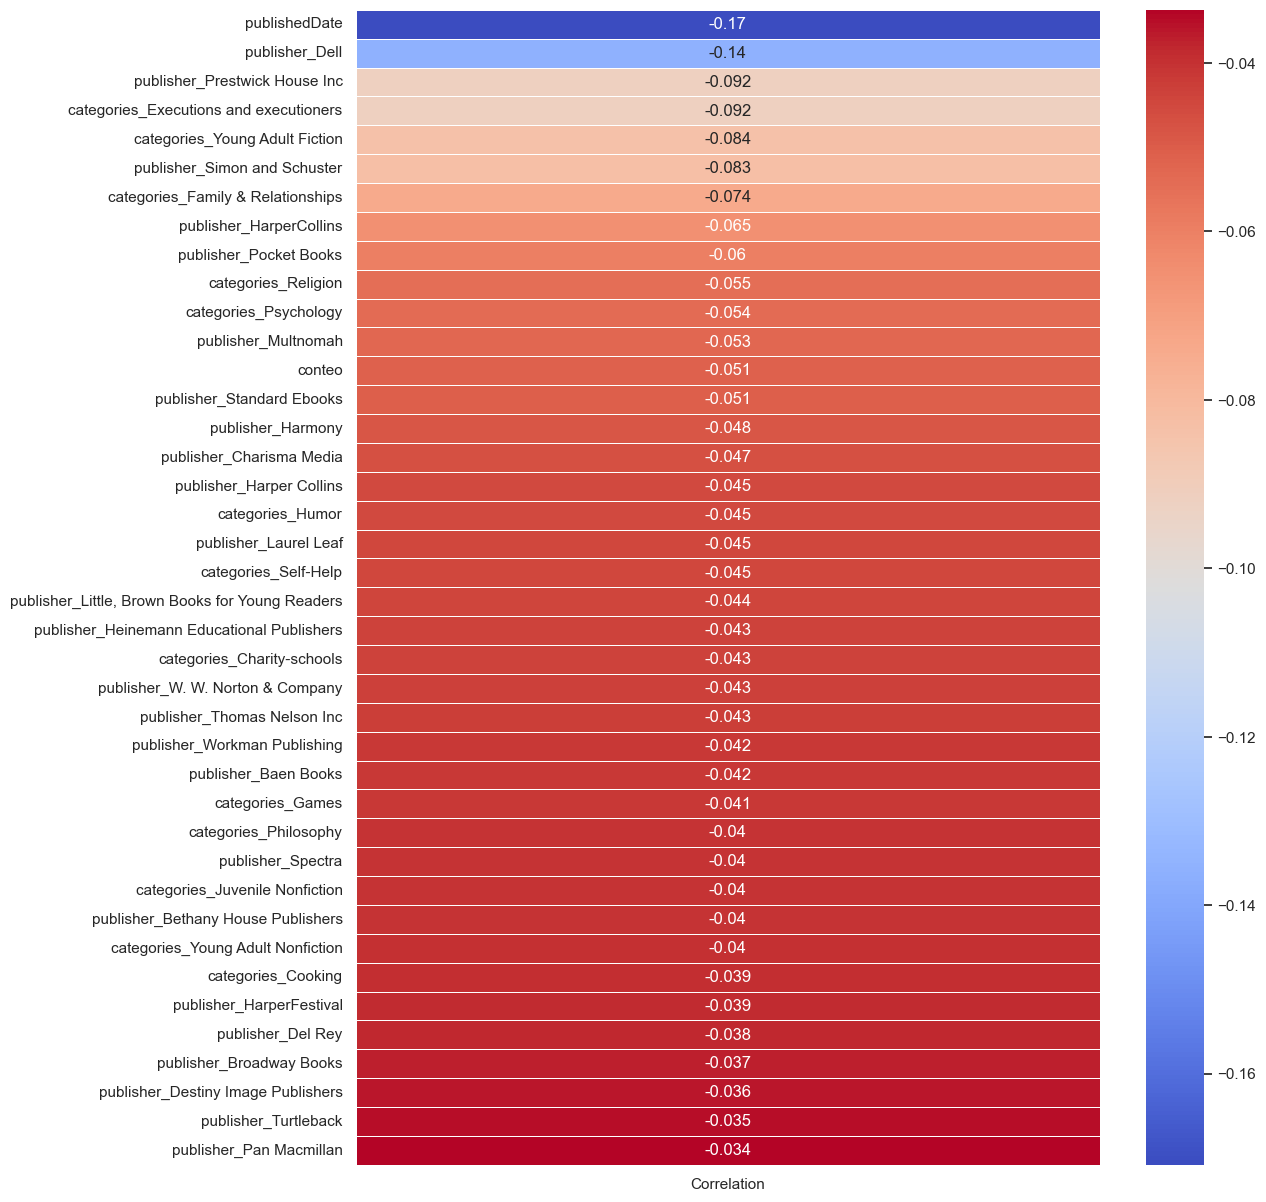

In [140]:
rangos = get_correlation_ranges(correlacion_precio_df)
correlation_heat_map(rangos, correlacion_precio_df)

### Análisis de correlación respecto a característica Rating (review/score)

In [141]:
correlacion_rating =df_cod_rating.corrwith(df_cod_rating['review/score'])
correlacion_rating_df = pd.DataFrame(correlacion_rating, columns=['Correlation']).sort_values('Correlation').dropna()
# Es necesario hacer la copia porque sino salta una excepción al momento de graficar
correlacion_rating_df_abs = correlacion_rating_df.copy()
correlacion_rating_df_abs['Abs_Correlation'] =correlacion_rating_df_abs['Correlation'].abs()
correlacion_rating_df_abs = correlacion_rating_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_rating_df_abs

Correlation  Abs_Correlation
review/score                          1.000000         1.000000
review_helpfulness_total             -0.333354         0.333354
review_helpfulness_up                -0.238016         0.238016
publisher_Dell                       -0.175293         0.175293
0_Thomas Harris                      -0.175293         0.175293
...                                        ...              ...
publisher_Houghton & Houghton         0.000371         0.000371
0_Boris Leonidovich Pasternak        -0.000318         0.000318
0_Todd Strasser                       0.000245         0.000245
publisher_Vital Health Publishing    -0.000104         0.000104
0_Cybele Pascal                      -0.000104         0.000104

[605 rows x 2 columns]

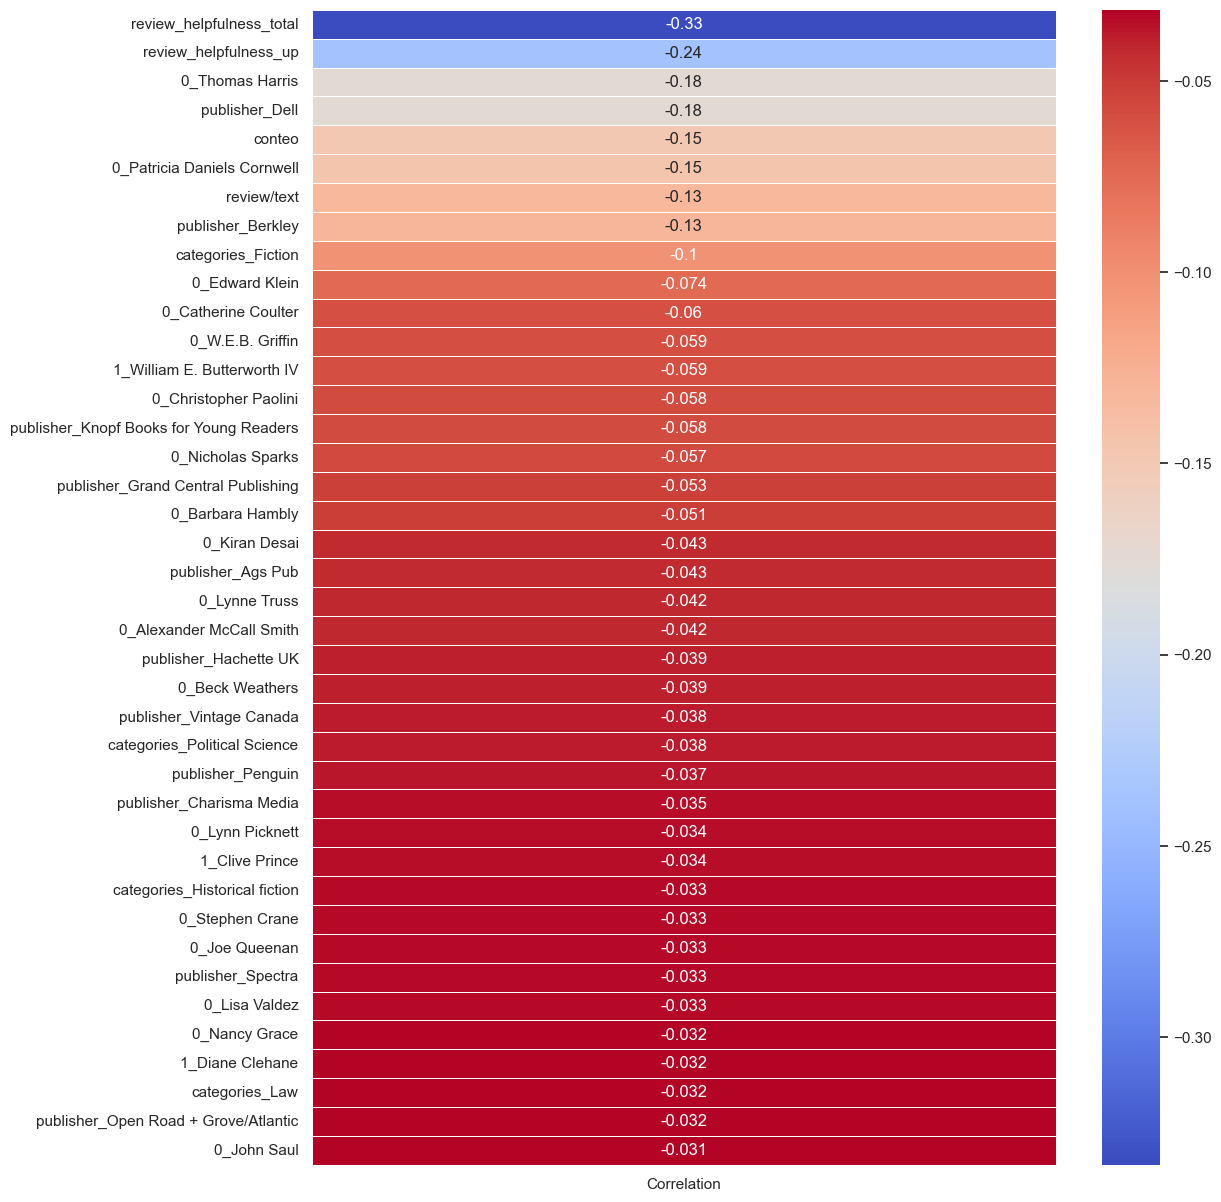

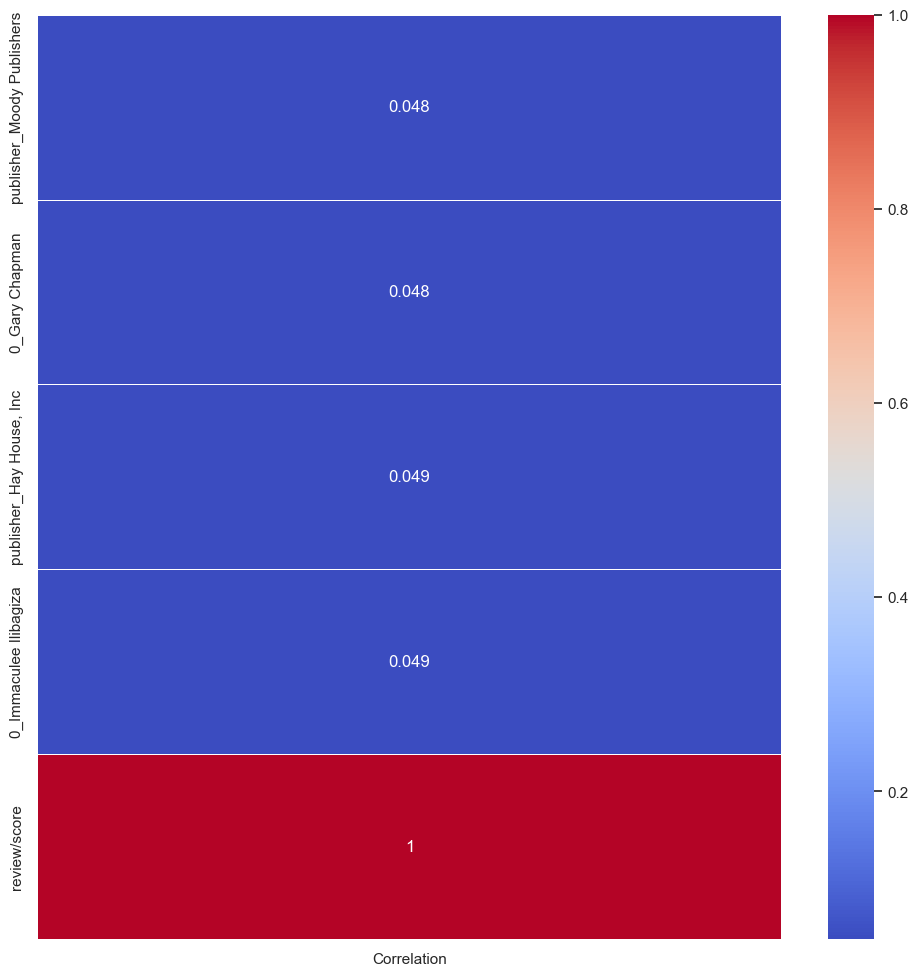

In [142]:
rangos = get_correlation_ranges(correlacion_rating_df)
correlation_heat_map(rangos, correlacion_rating_df)

Después de entrenar dos modelos distintos

# Entrenamiento de modelos

## Separación de datos de entrenamiento y validación

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

### Separación para hipótesis Precio

In [144]:
# Dividir el DataFrame en conjuntos de entrenamiento y validación de manera estratificada
df_price_train, df_price_val = train_test_split(df_cod_price, test_size=0.25, random_state=42, stratify=df_cod_price['Price'])

In [145]:
X_price_train = df_price_train.drop(columns='Price')
Y_price_train = df_price_train['Price']

X_price_val = df_price_val.drop(columns='Price')
Y_price_val = df_price_val['Price']

### Separación para hipótesis Autores

In [146]:
#df_authors_train, df_authors_val = train_test_split(df_cod_authors, test_size=0.25, random_state=42, stratify=df_cod_authors['authors'])

In [147]:
'''X_authors_train = df_authors_train.drop(columns='authors')
Y_authors_train = df_authors_train['authors']

X_authors_val = df_authors_val.drop(columns='authors')
Y_authors_val = df_authors_val['authors']'''

"X_authors_train = df_authors_train.drop(columns='authors')\nY_authors_train = df_authors_train['authors']\n\nX_authors_val = df_authors_val.drop(columns='authors')\nY_authors_val = df_authors_val['authors']"

### Separación para hipótesis Rating

In [148]:
df_rating_train, df_rating_val = train_test_split(df_cod_rating, test_size=0.25, random_state=42, stratify=df_cod_rating['review/score'])

In [149]:
X_rating_train = df_rating_train.drop(columns='review/score')
Y_rating_train = df_rating_train['review/score']

X_rating_val = df_rating_val.drop(columns='review/score')
Y_rating_val = df_rating_val['review/score']

### Entrenamiento clasificador para hipótesis Rating

In [150]:
rf_rating = RandomForestClassifier(n_estimators = 150, max_depth = 15, class_weight = 'balanced')
start = time.time()
rf_rating.fit(X_rating_train, Y_rating_train)
end = time.time()
print(f"Tiempo de entrenamiento: {end-start} segundos")

Tiempo de entrenamiento: 21.9630389213562 segundos


#### Métricas respecto a datos de entrenamiento

In [151]:
predicciones_train_rating = rf_rating.predict(X_rating_train)

In [152]:
accuracy_train_rating = accuracy_score(Y_rating_train, predicciones_train_rating)
print(f'Exactitud en los datos de entrenamiento: {accuracy_train_rating:.2f}')

Exactitud en los datos de entrenamiento: 0.60


In [153]:
predicciones_val_rating = rf_rating.predict(X_rating_val)

In [154]:
accuracy_val_rating = accuracy_score(Y_rating_val, predicciones_val_rating)
print(f'Exactitud en los datos de validacion: {accuracy_val_rating:.2f}')

Exactitud en los datos de validacion: 0.49


### Entrenamiento clasificador para hipótesis Autores

In [155]:
'''rf_autores = RandomForestClassifier(n_estimators = 150, max_depth = 12, class_weight = 'balanced')
start = time.time()
rf_autores.fit(X_authors_train, Y_authors_train)
end = time.time()
print(f"Tiempo de entrenamiento: {end-start} segundos")'''

'rf_autores = RandomForestClassifier(n_estimators = 150, max_depth = 12, class_weight = \'balanced\')\nstart = time.time()\nrf_autores.fit(X_authors_train, Y_authors_train)\nend = time.time()\nprint(f"Tiempo de entrenamiento: {end-start} segundos")'

In [156]:
#predicciones_train_autores = rf_autores.predict(X_authors_train)

#### Métricas respecto a datos de entrenamiento

In [157]:
#accuracy_train_autores = accuracy_score(Y_authors_train, predicciones_train_autores)
#print(f'Exactitud en los datos de entrenamiento: {accuracy_train_autores:.2f}')

In [158]:
#predicciones_val_autores = rf_autores.predict(X_authors_val)
#accuracy_val_autores = accuracy_score(Y_authors_val, predicciones_val_autores)
#print(f'Exactitud en los datos de validación: {accuracy_val_autores:.2f}')

In [159]:
#rf_autores.feature_importances_

### Clasificador MLP para autores

In [160]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [161]:
'''start = time.time()
mlp_autores = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=400, activation='logistic', alpha=0.001,  random_state=17)
mlp_autores.fit(X_authors_train, Y_authors_train)
end = time.time()

print(f"Tiempo de entrenamiento: {end-start}")'''

'start = time.time()\nmlp_autores = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=400, activation=\'logistic\', alpha=0.001,  random_state=17)\nmlp_autores.fit(X_authors_train, Y_authors_train)\nend = time.time()\n\nprint(f"Tiempo de entrenamiento: {end-start}")'

In [162]:
'''predicciones_train_autores_mlp = mlp_autores.predict(X_authors_train)
accuracy_train_autores_mlp = accuracy_score(Y_authors_train, predicciones_train_autores_mlp)
print(f'Exactitud en los datos de entrenamiento: {accuracy_train_autores_mlp:.2f}')'''

"predicciones_train_autores_mlp = mlp_autores.predict(X_authors_train)\naccuracy_train_autores_mlp = accuracy_score(Y_authors_train, predicciones_train_autores_mlp)\nprint(f'Exactitud en los datos de entrenamiento: {accuracy_train_autores_mlp:.2f}')"

In [163]:
from sklearn.preprocessing import LabelEncoder
'''df_cod_ord = df.copy()

# Lista de columnas a codificar
columnas_label = ['Title', 'authors', 'publisher', 'categories']

# Crear una instancia del codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna
for columna in columnas_label:
    df_cod_ord[columna] = label_encoder.fit_transform(df_cod_ord[columna])

# Ver el DataFrame resultante
df_cod_ord.head()

df_cod_ord = df_cod_ord.drop(columns='Id')
correlacion_authors_ord =df_cod_ord.corrwith(df_cod_ord['authors'])
correlacion_authors_ord_df = pd.DataFrame(correlacion_authors_ord, columns=['Correlation']).sort_values('Correlation').dropna()
# Es necesario hacer la copia porque sino salta una excepción al momento de graficar
correlacion_authors_ord_df_abs = correlacion_authors_ord_df.copy()
correlacion_authors_ord_df_abs['Abs_Correlation'] =correlacion_authors_ord_df_abs['Correlation'].abs()
correlacion_authors_ord_df_abs = correlacion_authors_ord_df_abs.sort_values(by='Abs_Correlation', ascending=False)
correlacion_authors_ord_df_abs'''

"df_cod_ord = df.copy()\n\n# Lista de columnas a codificar\ncolumnas_label = ['Title', 'authors', 'publisher', 'categories']\n\n# Crear una instancia del codificador\nlabel_encoder = LabelEncoder()\n\n# Aplicar Label Encoding a cada columna\nfor columna in columnas_label:\n    df_cod_ord[columna] = label_encoder.fit_transform(df_cod_ord[columna])\n\n# Ver el DataFrame resultante\ndf_cod_ord.head()\n\ndf_cod_ord = df_cod_ord.drop(columns='Id')\ncorrelacion_authors_ord =df_cod_ord.corrwith(df_cod_ord['authors'])\ncorrelacion_authors_ord_df = pd.DataFrame(correlacion_authors_ord, columns=['Correlation']).sort_values('Correlation').dropna()\n# Es necesario hacer la copia porque sino salta una excepción al momento de graficar\ncorrelacion_authors_ord_df_abs = correlacion_authors_ord_df.copy()\ncorrelacion_authors_ord_df_abs['Abs_Correlation'] =correlacion_authors_ord_df_abs['Correlation'].abs()\ncorrelacion_authors_ord_df_abs = correlacion_authors_ord_df_abs.sort_values(by='Abs_Correlation'

Después de realizar el entrenamiento de dos modelos distintos para la predicción de la característica Autores, nos encontramos que ambos modelos son capaces de predecir perfectamente esta característica con una exactitud del 100% tanto para los datos de entrenamiento como de validación. Para analizar las posibles causas de los resultados obtenidos decidimos realizar un análisis de correlación a partir de una codificación por etiqueta (asignando un número entero positivo a cada posible valor) de las variables categóricas para determinar si existe algún campo que tenga una influencia muy alta al momento de tomar la decisión sobre el autor del libro al que corresponde la reseña, pero nos encontramos con que los valores de las correlaciones respecto al autor se encuentran dentro de un rango normal, no hay ninguna variable que sobresalga en relación con las demás.

### Entrenamiento modelo para hipótesis Precio

In [164]:
start = time.time()
mlp_precio = MLPRegressor(hidden_layer_sizes=(10,20,10), max_iter=300, activation='logistic', alpha=0.001,  random_state=17)
mlp_precio.fit(X_price_train, Y_price_train)
end = time.time()

print(f"Tiempo de entrenamiento: {end-start}")

Tiempo de entrenamiento: 185.91337704658508


D:\Repo ciencias de datos\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [165]:
from sklearn.metrics import mean_squared_error

In [166]:
predicciones_train_price = mlp_precio.predict(X_price_train)
mse_price = mean_squared_error(Y_price_train, predicciones_train_price)
print(f'Error cuadrático medio: {mse_price:.2f}')

Error cuadrático medio: 7.95


In [167]:
predicciones_val_price = mlp_precio.predict(X_price_val)
mse_price_val = mean_squared_error(Y_price_val, predicciones_val_price)
print(f'Error cuadrático medio: {mse_price_val:.2f}')

Error cuadrático medio: 7.72


In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [169]:
predicciones_val_price = mlp_precio.predict(X_price_val)
mse_price_val = mean_squared_error(Y_price_val, predicciones_val_price)
mae_price_val = mean_absolute_error(Y_price_val, predicciones_val_price)
r2_price_val = r2_score(Y_price_val, predicciones_val_price)
rmse_price_val = np.sqrt(mse_price_val)
medae_prive_val = median_absolute_error(Y_price_val, predicciones_val_price)
print(f'Error cuadrático medio: {mse_price_val:.2f}')
print(f'Error absoluto medio: {mae_price_val:.2f}')
print(f'R-squared (variabilidad capturada): {r2_price_val:.2f}')
print(f'Raiz cuadrada del MSE: {rmse_price_val:.2f}')
print(f"Error Absoluto mediano: {medae_prive_val}") #Menos suceptible a valores extremos que el MAE

Error cuadrático medio: 7.72
Error absoluto medio: 0.84
R-squared (variabilidad capturada): 0.97
Raiz cuadrada del MSE: 2.78
Error Absoluto mediano: 0.2573164081695207


## Resumen codificación:

- Codificación one-hot para las columnas: 'authors', 'publisher' y 'categories'
- Se copian las columnas 'Price', 'authors' y 'review/score' porque son sobre las que se tiene que hacer el análisis y no pueden estar normalizadas, estandarizadas ni en one-hot
- Se codifica la columna authors asignándo un número entre 0 y 54 (podría ser entre 1 y 55)
- Las columnas 'review/text','review_helpfulness_up' y 'review_helpfulness_total' tienen algunos valores atípicos MUY EXTREMOS, por eso se les aplicó una transformación logarítmica antes de estandarizar.
- Se estandarizaron (media = 0 y de = 1) las columnas 'review/text', 'Price_cod','review/score_cod', 'conteo', 'review_helpfulness_up', 'review_helpfulness_total' y 'publishedDate'